# https://www.sqlite.org/fts3.html

# -----------------------------
# Works Freaking GREAT !
## Download tweets and save in FTS3 format, 
## then do a full text search for terms

# FIRST Download tweets on subject of your choice.
## Save in a text.file --- hurricane_14.txt

Modes of writing to a file:<br />
Read 	r 	&nbsp;&nbsp;&nbsp;&nbsp;Only read from the file<br />
Write> 	w 	&nbsp;&nbsp;&nbsp;&nbsp;Erase and write to a file<br />
Append 	a 	&nbsp;&nbsp;&nbsp;&nbsp;Add new lines to the end of a file<br />
Read & Write 	r+ 	&nbsp;&nbsp;&nbsp;&nbsp;Read and write to a file without overwriting it<br />
Write & Read(Overwrite) 	w+ 	&nbsp;&nbsp;&nbsp;&nbsp;Write and read a file, overwriting its contents<br />
<b>MEANING - After the original file is created, The file below may be used to 'append'<br />
the original twitter file:</b><br />
You Must Change from  filein = open(tweetfile, 'w') to filein = open(tweetfile, 'a')

In [ ]:
import sys
sys.path.insert(0,"/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython
import Key
CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]
t=0
sTime= time.time()
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY,ACCESS_SECRET)
tweetfile = 'hurricane_14.txt'
results = twitter.cursor(twitter.search, q='hurricane, Irma')
filein = open(tweetfile, 'w')
for result in results:
    result=str(result)
    filein.write(result)
    print(result)
    if time.time() - sTime > 4:
        filein.close()
        sys.exit()
         

# Create the database using FTS3

In [ ]:
import sqlite3
conn = sqlite3.connect('data/hurricane.db')
c = conn.cursor()
c.execute("""
CREATE VIRTUAL TABLE hurr 
USING FTS3(text, keywords);
""")
conn.commit()
conn.close()

# Copy text file into database:
Easy control parameters: <br /><br />
chars_per_line = 140 <br /><br />
keywords = 'sept, hurricaneirma, florida'<br /><br />
<b>Lines to be entered into database</b><br />
lines = 400

In [11]:
import re
import textwrap
import time
import sqlite3
import sys
import base64
import time
#conn = sqlite3.connect('hurricane.db')
#c = conn.cursor()
# Create table
#c.execute('''CREATE TABLE hurricane
#             (hurricane text, keywords text)''')
count=0
lines = 400
with open("hurricane_14.txt") as f:
    text = f.read()
    words = " ".join(re.findall("[a-zA-Z]+", text))
    words = words.replace(' u ', ' ');words = words.replace('u ', '');words = words.replace(' U ', ' ')
    chars_per_line = 140
    for i in range(0, len(words), chars_per_line):
        file= ("[(",words[i:i+chars_per_line],"),]")
        #data= ("[('"+words[i:i+chars_per_line]+"'),]")
        file = str(file)
        #file = 'base64 encoding allows code to be stored and retieved in the same format it was posted'
        keywords = 'sept, hurricaneirma, florida'
        conn = sqlite3.connect('data/hurricane.db')
        c = conn.cursor()
        time.sleep(1)
        #encodedlistvalue=base64.b64encode(file[2:-2])
        #c.execute("INSERT INTO hurricane VALUES (?,?)", (encodedlistvalue, b)) 
        c.execute("INSERT INTO hurr VALUES (?,?)", (file, keywords)) 
        conn.commit()
        conn.close()        
        
        
        time.sleep(1)
        print file[2:-2]
        count=count+1
        print count
        if count>lines:
            sys.exit()
#commits and closes database if there are less then 400 lines of text
conn.commit()
conn.close()                 

[(', 'contributors None truncated False text Good weather in Oklahoma but still praying for Texas and Florida f af f af f af f aa f aa f aa is quo', '),]
1
[(', 'te status False in reply to status id None id favorite count entities symbols user mentions hashtags urls retweeted False coordinates None s', '),]
2
[(', 'ource a href http twitter com download android rel nofollow Twitter for Android a in reply to screen name None in reply to user id None retw', '),]
3
[(', 'eet count id str favorited False user follow request sent False has extended profile True profile use background image True default profile ', '),]
4
[(', 'image False id profile background image url https None verified False translator type none profile text color profile image url https https ', '),]
5
[(', 'pbs twimg com profile images yAbwrfNx normal jpg profile sidebar fill color DDEEF entities description urls followers count profile sidebar ', '),]
6
[(', 'border color C DEED id str profile background color F F FA

[(', ' url https t co RiUBfFVpIR media url https https pbs twimg com ext tw video thumb pimg VdjvmYGHLameNvCT jpg source user id str source status', '),]
54
[(', ' id video info aspect ratio duration millis variants url https video twimg com ext tw video pvid x vPHqBqwJ QbJWZ w mp bitrate content type ', '),]
55
[(', 'video mp url https video twimg com ext tw video ppl USzT Hz ID OZjfy m content type application x mpegURL url https video twimg com ext tw v', '),]
56
[(', 'ideo pvid x Cdy Emt AW Eb fs mp bitrate content type video mp id str sizes small h resize fit w large h resize fit w medium h resize fit w t', '),]
57
[(', 'humb h resize crop w indices type video id media url http pbs twimg com ext tw video thumb pimg VdjvmYGHLameNvCT jpg metadata iso language c', '),]
58
[(', 'ode pt result type recent contributors None truncated False text RT Jocho AEEONLINE Terminan de poner la luz en todo florida orlando y a mi ', '),]
59
[(', 'no me llega la luz Gracias is quote status False in 

[(', 'e id profile background image url https https pbs twimg com profile background images Blg pIzh jpeg verified False translator type none prof', '),]
107
[(', 'ile text color profile image url https https pbs twimg com profile images zSXeDgb normal jpeg profile sidebar fill color DDEEF entities url ', '),]
108
[(', 'urls url http t co R tqzVN Jindices expanded url http wylietrucking com display url wylietrucking com description urls url https t co Q GUvZ', '),]
109
[(', 'N I indices expanded url http wylietough com display url wylietough com followers count profile sidebar border color FFFFFF id str profile b', '),]
110
[(', 'ackground color listed count is translation enabled False utc offset statuses count description wylietough WylieGear Flatbed OTR StepDeck He', '),]
111
[(', 'avyHaul WylieTough https t co Q GUvZN I friends count location West Fargo ND profile link color profile image url http pbs twimg com profile', '),]
112
[(', ' images zSXeDgb normal jpeg following False ge

[(', ' pimg VdjvmYGHLameNvCT jpg source user id str source status id video info aspect ratio duration millis variants url https video twimg com ex', '),]
159
[(', 't tw video pvid x vPHqBqwJ QbJWZ w mp bitrate content type video mp url https video twimg com ext tw video ppl USzT Hz ID OZjfy m content ty', '),]
160
[(', 'pe application x mpegURL url https video twimg com ext tw video pvid x Cdy Emt AW Eb fs mp bitrate content type video mp id str sizes small ', '),]
161
[(', 'h resize fit w large h resize fit w medium h resize fit w thumb h resize crop w indices type video id media url http pbs twimg com ext tw vi', '),]
162
[(', 'deo thumb pimg VdjvmYGHLameNvCT jpg metadata iso language code pt result type recent contributors None truncated False text RT JohnJacob Pra', '),]
163
[(', 'y for Florida n nFlorida https t co RiUBfFVpIR is quote status False in reply to status id None id favorite count entities symbols user ment', '),]
164
[(', 'ions id indices id str screen name JohnJacob n

[(', 'ps t co HIdMvbbudj is quote status False in reply to status id None id favorite count entities symbols user mentions id indices id str scree', '),]
211
[(', 'n name FoxNews name Fox News hashtags urls media source user id source status id str expanded url https twitter com FoxNews status video dis', '),]
212
[(', 'play url pic twitter com HIdMvbbudj url https t co HIdMvbbudj media url https https pbs twimg com amplify video thumb img rTPcYOpHdoXLEZm jp', '),]
213
[(', 'g source user id str source status id id str sizes small h resize fit w large h resize fit w medium h resize fit w thumb h resize crop w ind', '),]
214
[(', 'ices type photo id media url http pbs twimg com amplify video thumb img rTPcYOpHdoXLEZm jpg retweeted False coordinates None source a href h', '),]
215
[(', 'ttp twitter com download iphone rel nofollow Twitter for iPhone a in reply to screen name None in reply to user id None retweet count id str', '),]
216
[(', ' favorited False retweeted status contributors

[(', 'rl https video twimg com amplify video vid x ADNL prvAdpMgFoo mp bitrate content type video mp url https video twimg com amplify video pl MF', '),]
263
[(', 'LeoSh F radz m content type application x mpegURL url https video twimg com amplify video vid x ky hiZ iZwvg zup mp bitrate content type vid', '),]
264
[(', 'eo mp url https video twimg com amplify video vid x EZZdyMTizY q Kmp bitrate content type video mp id str sizes small h resize fit w large h', '),]
265
[(', ' resize fit w medium h resize fit w thumb h resize crop w indices type video id media url http pbs twimg com amplify video thumb img rTPcYOp', '),]
266
[(', 'HdoXLEZm jpg metadata iso language code en result type recent contributors None truncated False text RT NBCNews WATCH Sister Margaret Ann cl', '),]
267
[(', 'ears debris with a chainsaw in South Florida n n Via Miami Dade police https t co bbMvyYReZQ is quote status False in reply to status id Non', '),]
268
[(', 'e id favorite count entities symbols user ment

[(', 'ound color listed count is translation enabled False utc offset statuses count description The leading source of global news and information', '),]
315
[(', ' for more than years Facebook https t co oeDi xACU Snapchat https t co suOkoNb KE friends count location New York NY profile link color A pr', '),]
316
[(', 'ofile image url http pbs twimg com profile images l PSFLJb normal jpg following False geo enabled True profile banner url https pbs twimg co', '),]
317
[(', 'm profile banners profile background image url http pbs twimg com profile background images VAaUv jpeg screen name NBCNews lang en profile b', '),]
318
[(', 'ackground tile True favourites count name NBC News notifications False url http t co UXSP YuW created at Tue Mar contributors enabled False ', '),]
319
[(', 'time zone Eastern Time US Canada protected False default profile False is translator False embeddable True description title source user id ', '),]
320
[(', 'source status id str expanded url https twitte

[(', 'mg com profile banners profile background image url http abs twimg com images themes theme bg png screen name FlightBreaking lang en profile', '),]
367
[(', ' background tile False favourites count name Breaking Flight News notifications False url https t co RkxLVpKtxj created at Fri Jun contribut', '),]
368
[(', 'ors enabled False time zone Berlin protected False default profile False is translator False geo None in reply to user id str None possibly ', '),]
369
[(', 'sensitive False lang en created at Tue Sep in reply to status id str None place None metadata iso language code en result type recent contri', '),]
370
[(', 'butors None truncated False text RT GSalvitano Hoy Florida con personas desplazadas y pasos cortados f a n FloridaIDF sinae oficial PajaroEn', '),]
371
[(', 'ciso ccap https t co o is quote status False in reply to status id None id favorite count entities symbols user mentions id indices id str s', '),]
372
[(', 'creen name GSalvitano name Gabriela Salvitano 

SystemExit: 

# How to search your FTS3 database

In [20]:
# t = ('Html',)
#c.execute('SELECT * FROM python WHERE keyword=?', t)
import sqlite3
import sys
conn = sqlite3.connect('data/hurricane.db')
c = conn.cursor()# Never 
count=0
req=4
search = 'hurricane'
#for row in c.execute('SELECT * FROM hurr WHERE text MATCH ?',search):
for row in c.execute('SELECT * FROM hurr WHERE text MATCH "False source"'):
    
    #SELECT * FROM docs WHERE docs MATCH 'sqlite AND database';    
    
    count=count+1
    print(row),"\n-----\n"
    if count > req:
        conn.close()
        sys.exit()
        

(u"('[(', 'FVpIR is quote status False in reply to status id None id favorite count entities symbols user mentions hashtags urls media source user id s', '),]')", u'hurricane, hurricaneirma, florida') 
-----

(u"('[(', 'humb pimg VdjvmYGHLameNvCT jpg retweeted False coordinates None source a href http twitter com download iphone rel nofollow Twitter for iPho', '),]')", u'hurricane, hurricaneirma, florida') 
-----

(u"('[(', ' place None extended entities media additional media info monetizable False source user id source status id str expanded url https twitter c', '),]')", u'hurricane, hurricaneirma, florida') 
-----

(u"('[(', 'zable False source user id source status id str expanded url https twitter com geiwajima status video display url pic twitter com RiUBfFVpIR', '),]')", u'hurricane, hurricaneirma, florida') 
-----

(u"('[(', 'tr screen name Jocho name La J id indices id str screen name AEEONLINE name AEE hashtags urls retweeted False coordinates None source a href', '),]')", u

SystemExit: 

In [35]:
import sqlite3
import sys
conn = sqlite3.connect('data/hurricane.db')
c = conn.cursor()# Never 
count=0
req=14
for row in c.execute('SELECT * FROM hurr'):
    count=count+1
    print(row),"\n-----\n"
    if count > req:
        conn.close()
        sys.exit()
        

(u"('[(', 'contributors None truncated False text Good weather in Oklahoma but still praying for Texas and Florida f af f af f af f aa f aa f aa is quo', '),]')", u'hurricane, hurricaneirma, florida') 
-----

(u"('[(', 'te status False in reply to status id None id favorite count entities symbols user mentions hashtags urls retweeted False coordinates None s', '),]')", u'hurricane, hurricaneirma, florida') 
-----

(u"('[(', 'ource a href http twitter com download android rel nofollow Twitter for Android a in reply to screen name None in reply to user id None retw', '),]')", u'hurricane, hurricaneirma, florida') 
-----

(u"('[(', 'eet count id str favorited False user follow request sent False has extended profile True profile use background image True default profile ', '),]')", u'hurricane, hurricaneirma, florida') 
-----

(u"('[(', 'image False id profile background image url https None verified False translator type none profile text color profile image url https https ', '),]')", u

SystemExit: 

# -- END FTS3 STUFF -- -- END FTS3 STUFF -- -- END FTS3 STUFF -- -- 

# ------------------------------------------------------------------

In [ ]:
http://sebsauvage.net/python/snyppets/

import os
for filename in os.listdir(r'/home/jack'):
    print filename

# Creat SQLITE database

In [1]:
import sqlite3
conn = sqlite3.connect('ipydb.db')

# Creating Tables

In [2]:
import sqlite3
conn = sqlite3.connect('ipydb.db')
c = conn.cursor()
# Create table
c.execute('''CREATE TABLE python
             (code text, keyword text)''')
# Insert a row of data
c.execute("INSERT INTO python VALUES ('Python','Storage for snippets and more')")
# Save (commit) the changes
conn.commit()
# We can also close the connection if we are done with it.
# Just be sure any changes have been committed or they will be lost.
conn.close()

In [3]:
import sqlite3
conn = sqlite3.connect('ipydb.db')
c = conn.cursor()

c.execute("INSERT INTO python VALUES ('close the connection if we are done','connection')")

# Save (commit) the changes
conn.commit()

#close the connection 
conn.close()


# "pragma integrity_check;"

In [237]:

!sqlite3 ipydb.db "pragma integrity_check;"

ok


# Reading the Bash_History file

In [143]:
from time import sleep
fileO = open("/home/jack/.bash_history")
lists = fileO.readlines()
for list in lists:
    
    #list = list.encode("ascii", "ignore")
    list = list.decode('utf-8').strip() 
    sleep(1)
    print list

sudo ./bluemix
chmod a+x *.*
sudo chmod a+x *.*
ls
sudo chmod a+x *
./install_bluemix_cli
sudo ./install_bluemix_cli
sudo install_bluemix_cli
sudo ./install_bluemix_cli
#PATH
$PATH
ls


KeyboardInterrupt: 

In [33]:
import sqlite3
conn = sqlite3.connect('ipydb64.db')
c = conn.cursor()

# Larger example that inserts many records at a time
data = [('pragma integrity_check will check that your database is valid', 'check, verify, inspect'),
             ('multiple items may be entered at once', 'newkey'),
             ('base64 encoding allows code to be stored and retieved in the same format it was posted', '4Webstuff, gwebsite, gghtml'),]

c.executemany("INSERT INTO python VALUES (?,?)", data)
conn.commit()
conn.close()


# WORKING FINE - Storing Data as Base64

In [10]:
import sqlite3
import base64
conn = sqlite3.connect('ipydb64.db')
c = conn.cursor()
# Larger example that inserts many records at a time

a = encodedlistvalue=base64.b64encode(
    """# Larger example that inserts many records at a time
import sqlite3
import base64
conn = sqlite3.connect('/home/jack/Desktop/testPy.db')
c = conn.cursor()
# Larger example that inserts many records at a time

a = encodedlistvalue=base64.b64encode(
    xxccccc# Larger example that inserts many records at a time)
#c.execute("INSERT INTO python VALUES (?, ?)" a, b)
#c.execute("INSERT INTO python VALUES (%s, %s,)", (a, b))
c.execute("INSERT INTO python VALUES (?,?)", (a,b))

conn.commit()
conn.close()    
    """)

b = 'example'

c.execute("INSERT INTO python VALUES (?,?)", (a,b))

conn.commit()
conn.close()


In [1]:
import sqlite3
import base64

#Create a database to use base64: 
conn = sqlite3.connect('ipydb64.db')

c = conn.cursor()



file = 'base64 encoding allows code to be stored and retieved in the same format it was posted'
b = '4Webstuff, gwebsite, gghtml'
encodedlistvalue=base64.b64encode(file)

c.execute("INSERT INTO python VALUES (?,?)", (encodedlistvalue, b))

conn.commit()
conn.close()


## EXAMPLE   showing only the code area field is stored base64 - the search is plain text

In [13]:

import sqlite3
conn = sqlite3.connect('ipydb64.db')
c = conn.cursor()# Never 
for row in c.execute('SELECT * FROM python ORDER BY code'):
        print(row),"\n-----\n"

(u'IyBMYXJnZXIgZXhhbXBsZSB0aGF0IGluc2VydHMgbWFueSByZWNvcmRzIGF0IGEgdGltZQppbXBvcnQgc3FsaXRlMwppbXBvcnQgYmFzZTY0CmNvbm4gPSBzcWxpdGUzLmNvbm5lY3QoJy9ob21lL2phY2svRGVza3RvcC90ZXN0UHkuZGInKQpjID0gY29ubi5jdXJzb3IoKQojIExhcmdlciBleGFtcGxlIHRoYXQgaW5zZXJ0cyBtYW55IHJlY29yZHMgYXQgYSB0aW1lCgphID0gZW5jb2RlZGxpc3R2YWx1ZT1iYXNlNjQuYjY0ZW5jb2RlKAogICAgeHhjY2NjYyMgTGFyZ2VyIGV4YW1wbGUgdGhhdCBpbnNlcnRzIG1hbnkgcmVjb3JkcyBhdCBhIHRpbWUpCiNjLmV4ZWN1dGUoIklOU0VSVCBJTlRPIHB5dGhvbiBWQUxVRVMgKD8sID8pIiBhLCBiKQojYy5leGVjdXRlKCJJTlNFUlQgSU5UTyBweXRob24gVkFMVUVTICglcywgJXMsKSIsIChhLCBiKSkKYy5leGVjdXRlKCJJTlNFUlQgSU5UTyBweXRob24gVkFMVUVTICg/LD8pIiwgKGEsYikpCgpjb25uLmNvbW1pdCgpCmNvbm4uY2xvc2UoKSAgICAKICAgIA==', u'example') 
-----

(u'YmFzZTY0IGVuY29kaW5nIGFsbG93cyBjb2RlIHRvIGJlIHN0b3JlZCBhbmQgcmV0aWV2ZWQgaW4gdGhlIHNhbWUgZm9ybWF0IGl0IHdhcyBwb3N0ZWQ=', u'4Webstuff, gwebsite, gghtml') 
-----

(u'YmFzZTY0IGVuY29kaW5nIGFsbG93cyBjb2RlIHRvIGJlIHN0b3JlZCBhbmQgcmV0aWV2ZWQgaW4gdGhlIHNhbWUgZm9ybWF0IGl0IHdhcyBwb3N0ZWQ=', u'4Web

In [14]:
import sqlite3
conn = sqlite3.connect('ipydb64.db')
c = conn.cursor()# Never 
for row in c.execute('SELECT * FROM python ORDER BY code'):
        #print(row),"\n-----\n","\n"
        
        data= row[0],
        print data
        

(u'IyBMYXJnZXIgZXhhbXBsZSB0aGF0IGluc2VydHMgbWFueSByZWNvcmRzIGF0IGEgdGltZQppbXBvcnQgc3FsaXRlMwppbXBvcnQgYmFzZTY0CmNvbm4gPSBzcWxpdGUzLmNvbm5lY3QoJy9ob21lL2phY2svRGVza3RvcC90ZXN0UHkuZGInKQpjID0gY29ubi5jdXJzb3IoKQojIExhcmdlciBleGFtcGxlIHRoYXQgaW5zZXJ0cyBtYW55IHJlY29yZHMgYXQgYSB0aW1lCgphID0gZW5jb2RlZGxpc3R2YWx1ZT1iYXNlNjQuYjY0ZW5jb2RlKAogICAgeHhjY2NjYyMgTGFyZ2VyIGV4YW1wbGUgdGhhdCBpbnNlcnRzIG1hbnkgcmVjb3JkcyBhdCBhIHRpbWUpCiNjLmV4ZWN1dGUoIklOU0VSVCBJTlRPIHB5dGhvbiBWQUxVRVMgKD8sID8pIiBhLCBiKQojYy5leGVjdXRlKCJJTlNFUlQgSU5UTyBweXRob24gVkFMVUVTICglcywgJXMsKSIsIChhLCBiKSkKYy5leGVjdXRlKCJJTlNFUlQgSU5UTyBweXRob24gVkFMVUVTICg/LD8pIiwgKGEsYikpCgpjb25uLmNvbW1pdCgpCmNvbm4uY2xvc2UoKSAgICAKICAgIA==',)
(u'YmFzZTY0IGVuY29kaW5nIGFsbG93cyBjb2RlIHRvIGJlIHN0b3JlZCBhbmQgcmV0aWV2ZWQgaW4gdGhlIHNhbWUgZm9ybWF0IGl0IHdhcyBwb3N0ZWQ=',)
(u'YmFzZTY0IGVuY29kaW5nIGFsbG93cyBjb2RlIHRvIGJlIHN0b3JlZCBhbmQgcmV0aWV2ZWQgaW4gdGhlIHNhbWUgZm9ybWF0IGl0IHdhcyBwb3N0ZWQ=',)


# Viewing the base64 Decoded

In [21]:
import sqlite3
conn = sqlite3.connect('ipydb64.db')

c = conn.cursor()# Never 
for row in c.execute('SELECT * FROM python ORDER BY code'):
                
        s2 = row[0].encode('ascii')
        encodedlistvalue=base64.b64decode(s2)
        print encodedlistvalue, '\n', 'Keywords:', row[1], '\n -----------------------------\n'

        

# Larger example that inserts many records at a time
import sqlite3
import base64
conn = sqlite3.connect('/home/jack/Desktop/testPy.db')
c = conn.cursor()
# Larger example that inserts many records at a time

a = encodedlistvalue=base64.b64encode(
    xxccccc# Larger example that inserts many records at a time)
#c.execute("INSERT INTO python VALUES (?, ?)" a, b)
#c.execute("INSERT INTO python VALUES (%s, %s,)", (a, b))
c.execute("INSERT INTO python VALUES (?,?)", (a,b))

conn.commit()
conn.close()    
     
Keywords: example 
 -----------------------------

base64 encoding allows code to be stored and retieved in the same format it was posted 
Keywords: 4Webstuff, gwebsite, gghtml 
 -----------------------------

base64 encoding allows code to be stored and retieved in the same format it was posted 
Keywords: 4Webstuff, gwebsite, gghtml 
 -----------------------------

base64 encoding allows code to be stored and retieved in the same format it was posted 
Keywords: 4Webstuff, gwebsite,

In [49]:
conn = sqlite3.connect('ipydb64.db')
c = conn.cursor()# Never 

t = ('example',)
for row in c.execute('SELECT * FROM python WHERE keyword=?', t):
                
        s2 = row[0].encode('ascii')
        encodedlistvalue=base64.b64decode(s2)
        print encodedlistvalue, '\n', 'Keywords:', row[1], '\n -----------------------------\n'


# Larger example that inserts many records at a time
import sqlite3
import base64
conn = sqlite3.connect('/home/jack/Desktop/testPy.db')
c = conn.cursor()
# Larger example that inserts many records at a time

a = encodedlistvalue=base64.b64encode(
    xxccccc# Larger example that inserts many records at a time)
#c.execute("INSERT INTO python VALUES (?, ?)" a, b)
#c.execute("INSERT INTO python VALUES (%s, %s,)", (a, b))
c.execute("INSERT INTO python VALUES (?,?)", (a,b))

conn.commit()
conn.close()    
     
Keywords: example 
 -----------------------------



In [57]:
conn = sqlite3.connect('ipydb64.db')
c = conn.cursor()# Never 

t = ('example',)
for row in c.execute('SELECT code FROM python WHERE keyword=?', t):

    #subjectList = [row[0] for row in c.fetchall()]        
    code = row[0].encode('ascii')
    
    #for row in data :
    encodedlistvalue=base64.b64decode(code)
    print encodedlistvalue, '\n', 'Keywords:', row[1], '\n -----------------------------\n'


 # Larger example that inserts many records at a time
import sqlite3
import base64
conn = sqlite3.connect('/home/jack/Desktop/testPy.db')
c = conn.cursor()
# Larger example that inserts many records at a time

a = encodedlistvalue=base64.b64encode(
    xxccccc# Larger example that inserts many records at a time)
#c.execute("INSERT INTO python VALUES (?, ?)" a, b)
#c.execute("INSERT INTO python VALUES (%s, %s,)", (a, b))
c.execute("INSERT INTO python VALUES (?,?)", (a,b))

conn.commit()
conn.close()    
     
Keywords:

IndexError: tuple index out of range

In [80]:
conn = sqlite3.connect('ipydb64.db')
c = conn.cursor()# Never 

t = ('example',)
c.execute('SELECT * FROM python WHERE keyword=?', t)

subjectList = [row[0] for row in c.fetchall()]        
#print row[0]
#for row in data :
encodedlistvalue=base64.b64decode(row[0])
print encodedlistvalue, '\n', 'Keywords:', row[1], '\n -----------------------------\n'


 # Larger example that inserts many records at a time
import sqlite3
import base64
conn = sqlite3.connect('/home/jack/Desktop/testPy.db')
c = conn.cursor()
# Larger example that inserts many records at a time

a = encodedlistvalue=base64.b64encode(
    xxccccc# Larger example that inserts many records at a time)
#c.execute("INSERT INTO python VALUES (?, ?)" a, b)
#c.execute("INSERT INTO python VALUES (%s, %s,)", (a, b))
c.execute("INSERT INTO python VALUES (?,?)", (a,b))

conn.commit()
conn.close()    
     
Keywords: example 
 -----------------------------



In [68]:
import sqlite3
import base64
conn = sqlite3.connect('ipydb64.db')
c = conn.cursor()# Never 

k = ('4Webstuff',)
c.execute('SELECT * FROM python WHERE keyword=?', k)

subjectList = [row[0] for row in c.fetchall()]        
#print row[0]
#for row in data :
encodedlistvalue=base64.b64decode(row[0])
print encodedlistvalue, '\n', 'Keywords:', row[1], '\n -----------------------------\n'


# Larger example that inserts many records at a time
import sqlite3
import base64
conn = sqlite3.connect('/home/jack/Desktop/testPy.db')
c = conn.cursor()
# Larger example that inserts many records at a time

a = encodedlistvalue=base64.b64encode(
    xxccccc# Larger example that inserts many records at a time)
#c.execute("INSERT INTO python VALUES (?, ?)" a, b)
#c.execute("INSERT INTO python VALUES (%s, %s,)", (a, b))
c.execute("INSERT INTO python VALUES (?,?)", (a,b))

conn.commit()
conn.close()    
     
Keywords: example 
 -----------------------------



In [57]:
import sqlite3
conn = sqlite3.connect('/home/jack/Desktop/testPy.db')
c = conn.cursor()# Never 
#for row in c.execute('SELECT code FROM python ORDER BY keyword'):
s = ('committed',)
c.execute('SELECT code FROM python WHERE keyword=?', s)
        
          
print(c.fetchone())


(u'We can also close the connection if we are done with it',)


In [291]:
import sqlite3
conn = sqlite3.connect('/home/jack/Desktop/testPy.db')
c = conn.cursor()# Never do this -- insecure!
#    symbol = 'RHAT'
#    c.execute("SELECT * FROM python WHERE symbol = '%s'" % symbol)

# Do this instead
t = ('Html',)
c.execute('SELECT * FROM python WHERE keyword=?', t)
print(c.fetchone())


(u'Html', u'Webstuff, website, html')


In [417]:
import sqlite3
conn = sqlite3.connect('/home/jack/Desktop/testPy.db')
c = conn.cursor()# Never 
for row in c.execute('SELECT * FROM python ORDER BY code'):
        #print(row),"\n-----\n","\n"
          
        data = c.fetchall()
        print data

[(u'2Mysql', u'4sql, gmysql, tstore, database'), (u'2ffmpeg', u'4video, gfmpeg, hhpict to vid'), (u'Html', u'Webstuff, website, html'), (u'Html', u'Webstuff'), (u'Mysql', u'sql, mysql, store, database'), (u'Python', u'ffmpeg'), (u'eHhjY2NjY2NjY2NjeHh4eHh4eA==', u'xxxxxccccccccccccxxxxxxx'), (u'eHhjY2NjY2NjY2NjeHh4eHh4eA==', u'xxxxxccccccccccccxxxxxxx'), (u'eHhjY2NjYyMgTGFyZ2VyIGV4YW1wbGUgdGhhdCBpbnNlcnRzIG1hbnkgcmVjb3JkcyBhdCBhIHRpbWVjY2NjY3h4eHh4eHg=', u'xxxxxccccccccccccxxxxxxx'), (u'eHhjY2NjYyMgTGFyZ2VyIGV4YW1wbGUgdGhhdCBpbnNlcnRzIG1hbnkgcmVjb3JkcyBhdCBhIHRpbWVjY2NjY3h4eHh4eHg=', u'xxxxxccccccccccccxxxxxxx'), (u'eHhjY2NjYyMgTGFyZ2VyIGV4YW1wbGUgdGhhdCBpbnNlcnRzIG1hbnkgcmVjb3JkcyBhdCBhIHRpbWVjY2NjY3h4eHh4eHgKaW1wb3J0IHNxbGl0ZTMKaW1wb3J0IGJhc2U2NApjb25uID0gc3FsaXRlMy5jb25uZWN0KCcvaG9tZS9qYWNrL0Rlc2t0b3AvdGVzdFB5LmRiJykKYyA9IGNvbm4uY3Vyc29yKCkKIyBMYXJnZXIgZXhhbXBsZSB0aGF0IGluc2VydHMgbWFueSByZWNvcmRzIGF0IGEgdGltZQoKYSA9IGVuY29kZWRsaXN0dmFsdWU9YmFzZTY0LmI2NGVuY29kZSgKICAgIHh4Y2NjY2MjIExhc

In [445]:
import sqlite3
conn = sqlite3.connect('/home/jack/Desktop/testPy.db')
c = conn.cursor()# Never 
for row in c.execute('SELECT * FROM python ORDER BY code'):
        #print(row),"\n-----\n","\n"
        
        print row[0],"\n",row[1],"\n-----\n",

 2Html 
4Webstuff, gwebsite, gghtml 
-----
2Html 
4Webstuff, gwebsite, gghtml 
-----
2Mysql 
4sql, gmysql, tstore, database 
-----
2Mysql 
4sql, gmysql, tstore, database 
-----
2ffmpeg 
4video, gfmpeg, hhpict to vid 
-----
2ffmpeg 
4video, gfmpeg, hhpict to vid 
-----
Html 
Webstuff, website, html 
-----
Html 
Webstuff 
-----
Mysql 
sql, mysql, store, database 
-----
Python 
ffmpeg 
-----
We can also close the connection if we are done with it 
committed 
-----
eHhjY2NjY2NjY2NjeHh4eHh4eA== 
xxxxxccccccccccccxxxxxxx 
-----
eHhjY2NjY2NjY2NjeHh4eHh4eA== 
xxxxxccccccccccccxxxxxxx 
-----
eHhjY2NjYyMgTGFyZ2VyIGV4YW1wbGUgdGhhdCBpbnNlcnRzIG1hbnkgcmVjb3JkcyBhdCBhIHRpbWVjY2NjY3h4eHh4eHg= 
xxxxxccccccccccccxxxxxxx 
-----
eHhjY2NjYyMgTGFyZ2VyIGV4YW1wbGUgdGhhdCBpbnNlcnRzIG1hbnkgcmVjb3JkcyBhdCBhIHRpbWVjY2NjY3h4eHh4eHg= 
xxxxxccccccccccccxxxxxxx 
-----
eHhjY2NjYyMgTGFyZ2VyIGV4YW1wbGUgdGhhdCBpbnNlcnRzIG1hbnkgcmVjb3JkcyBhdCBhIHRpbWVjY2NjY3h4eHh4eHgKaW1wb3J0IHNxbGl0ZTMKaW1wb3J0IGJhc2U2NApjb25uID0gc3FsaX

In [292]:
import sqlite3
conn = sqlite3.connect('/home/jack/Desktop/testPy.db')
c = conn.cursor()# Never do this -- insecure!

t = ('Webstuff',)
c.execute('SELECT * FROM python ORDER BY keyword')
print(c.fetchall())
conn.close()


[(u'2Html', u'4Webstuff, gwebsite, gghtml'), (u'2Mysql', u'4sql, gmysql, tstore, database'), (u'2ffmpeg', u'4video, gfmpeg, hhpict to vid'), (u'Html', u'Webstuff'), (u'Html', u'Webstuff, website, html'), (u'Python', u'ffmpeg'), (u'fgfgHtml', u'fgfgWebstuff'), (u'Mysql', u'sql, mysql, store, database'), (u'new', u'test'), (u'ffmpeg', u'video, fmpeg, pict to vid')]


# Inserting data from input --- WORKING FINE 

In [2]:
import sqlite3
conn = sqlite3.connect('/home/jack/Desktop/main.db')

c = conn.cursor()

# DROP TABLE IF EXISTS
c.execute("DROP TABLE IF EXISTS Products")

In [3]:
import sqlite3
conn = sqlite3.connect('/home/jack/Desktop/main.db')
c = conn.cursor()
# Create table
c.execute("""CREATE TABLE Products (
             contact_id integer PRIMARY KEY,
             CatID text NOT NULL,
             description text NOT NULL,
             keywords text NOT NULL);
          """)
conn.commit()
conn.close()

In [ ]:
import re
import textwrap
import sqlite3
conn = sqlite3.connect('data/fts3hurricane.db')
c = conn.cursor()
# Create table
c.execute('''CREATE TABLE hurricane
             (hurricane text)''')
# Insert a row of data
#c.execute("INSERT INTO hurricane VALUES ('hurricane','first test line')")

# Save (commit) the changes
conn.commit()

# We can also close the connection if we are done with it.
# Just be sure any changes have been committed or they will be lost.


with open("hurricane_14.txt") as f:
    text = f.read()
    #This was added to get ride od the unicode u from showing up
    words = text.replace(' u ', ' ');words = words.replace('u ', '');words = words.replace(' U ', ' ')
    #This clears out the non-Alpha-numeric characters
    badtext = ''.join(c for c in map(chr, range(256)) if not c.isalnum())
   
    # limit the aount of characters perline displayed
    chars_per_line = 180
    for i in range(0, len(words), chars_per_line):
        
        #data= "hurricane_14.txt,",words[i:i+chars_per_line],","
        word = words.translate(None, badtext)
        data = [("hurricane_14.txt","),(",word[i:i+chars_per_line]),],
        data = str(data)
        words = data.replace("', '),(', '", '),(')
        #data = data[1:-2]
        conn = sqlite3.connect('data/fts3hurricane.db')
        c = conn.cursor()
        c.execute("INSERT INTO hurricane VALUES (?)", words)
        conn.commit()
        conn.close()        

In [ ]:
import sqlite3
def insert_product(product):
    with sqlite3.connect("fullsearch.db") as db:
        cursor = db.cursor()
        sql = "insert into Products (CatID,description,keywords) values (?, ?, ?)"
        cursor.execute(sql, product)
        db.commit()

if __name__ == "__main__":
    
    ID= int(input("enter the CatID of the product:>> "))
    Des = raw_input("Enter description: >>")
    Keywords = raw_input("Enter keywords: >>")
    product = (ID, Des, Keywords)
    insert_product(product)
    
    
    

In [448]:
import sqlite3
def insert_product(product):
    with sqlite3.connect("/home/jack/Desktop/main.db") as db:
        cursor = db.cursor()
        sql = "insert into Products (CatID,description,keywords) values (?, ?, ?)"
        cursor.execute(sql, product)
        db.commit()

if __name__ == "__main__":
    ID= input("enter the CatID of the product:>> "
    Des = raw_input("Enter description: >>")
    Keywords = raw_input("Enter keywords: >>")
    product = (ID,Des,Keywords)
    insert_product(product)

enter the CatID of the product:>> 121
Enter description: >>123
Enter keywords: >>1234


# Using a ktinker box - verified working

In [474]:
import sqlite3
import Tkinter as tk, tkSimpleDialog

class MyDialog(tkSimpleDialog.Dialog):
    def body(self, master):
        self.geometry("800x600")
        tk.Label(master, text="Enter your search string text:").grid(row=0)

        self.e1 = tk.Entry(master)
        self.e1.grid(row=0, column=1)
        return self.e1 # initial focus

    def apply(self):
        first = self.e1.get()
        self.result = first

def insert_product(product):
    with sqlite3.connect("/home/jack/Desktop/main.db") as db:
        cursor = db.cursor()
        sql = "insert into Products (CatID,description,keywords) values (?, ?, ?)"
        cursor.execute(sql, product)
        db.commit()

if __name__ == "__main__":
        ID= int(input("enter the CatID of the product:>> "))
        #Des = input("Enter description: >>")
        root = tk.Tk()
        root.withdraw()
        test = MyDialog(root, "Paste Code Here")
        Keywords = int(input("Enter keywords: >>"))
        insert = test.result
        product = (ID,insert,Keywords)
        insert_product(product)
    
       
    
    
    
    

enter the CatID of the product:>> 252525
Enter keywords: >>9997


In [5]:
import sqlite3
conn = sqlite3.connect("/home/jack/Desktop/main.db", isolation_level=None ,timeout=30000) 
print("Opened database successfully")
conn.close()


Opened database successfully


In [4]:
import sqlite3
conn = sqlite3.connect('/home/jack/Desktop/main.db')
c = conn.cursor()# Never do this -- insecure!
#    symbol = 'RHAT'
#    c.execute("SELECT * FROM python WHERE symbol = '%s'" % symbol)

# Do this instead
t = ('252525',)
c.execute('SELECT * FROM Products WHERE CatID=?', t)
print(c.fetchone())


None


# Inserting data from input --- 
# WORKING FINE -- END -- verified working

In [480]:
from tkinter import *
import Tkinter as tk, tkSimpleDialog

class MyDialog(tkSimpleDialog.Dialog):
    def body(self, master):
        self.geometry("800x600")
        tk.Label(master, text="Enter your search string text:").grid(row=0)

        self.e1 = tk.Entry(master)
        self.e1.grid(row=0, column=1)
        return self.e1 # initial focus

    def apply(self):
        first = self.e1.get()
        self.result = first


        root = tk.Tk()
        root.withdraw()
        test = MyDialog(root, "testing")
    def show_entry_fields():
        print("First Name: %s\n" % (e2.get()))

        master = Tk()
        Label(master, text="First Name").grid(row=0)
        e2 = Entry(master)
        e2.grid(row=0, column=1)
        Button(master, text='Quit', command=master.quit).grid(row=3, column=0, sticky=W, pady=4)
        Button(master, text='Show', command=show_entry_fields).grid(row=3, column=1, sticky=W, pady=4)

#mainloop( )


        
        
        
        
        mainloop( )


print test.result

33333333336666666666666666


In [482]:
from tkinter import *
import Tkinter as tk, tkSimpleDialog

def show_entry_fields():
   print("First Name: %s\nLast Name: %s" % (e1.get(), e2.get()))

master = Tk()
Label(master, text="First Name").grid(row=0)
Label(master, text="Last Name").grid(row=1)

e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=0, column=1)
e2.grid(row=1, column=1)

Button(master, text='Quit', command=master.quit).grid(row=3, column=0, sticky=W, pady=4)
Button(master, text='Show', command=show_entry_fields).grid(row=3, column=1, sticky=W, pady=4)

#mainloop( )






First Name: gfgfyyyyyyyyyyyy
Last Name: yyyyyyyyyyy
33333333336666666666666666


In [ ]:
class MyDialog(tkSimpleDialog.Dialog):
    def body(self, master):
        self.geometry("800x600")
        tk.Label(master, text="Enter your search string text:").grid(row=0)

        self.e1 = tk.Entry(master)
        self.e1.grid(row=0, column=1)
        return self.e1 # initial focus

    def apply(self):
        first = self.e1.get()
        self.result = first


        root = tk.Tk()
        root.withdraw()
        test = MyDialog(root, "testing")
mainloop( )


print test.result

In [459]:
import sqlite3
def insert_product(product):
    with sqlite3.connect("/home/jack/Desktop/main.db") as db:
        cursor = db.cursor()
        sql = "insert into Products (CatID,description,keywords) values (?, ?, ?)"
        cursor.execute(sql, product)
        db.commit()

if __name__ == "__main__":
    ID= int(input("enter the CatID of the product:>> "))
    Des = input("Enter description: >>")
    Keywords = int(input("Enter keywords: >>"))
    product = (ID,Des,Keywords)
    insert_product(product)
    
    
    
    
    
    
    

enter the CatID of the product:>> 444444444444
Enter description: >>5555555555555555555
Enter keywords: >>3232


In [466]:
import Tkinter as tk, tkSimpleDialog

class MyDialog(tkSimpleDialog.Dialog):
    def body(self, master):
        self.geometry("800x600")
        tk.Label(master, text="Enter your search string text:").grid(row=0)

        self.e1 = tk.Entry(master)
        self.e1.grid(row=0, column=1)
        return self.e1 # initial focus

    def apply(self):
        first = self.e1.get()
        self.result = first


root = tk.Tk()
root.withdraw()
test = MyDialog(root, "testing")
print test.result

sdsdsd


# Python - - - MySQL info and CRUD code.

In [ ]:
/etc/mysql/mysql.conf.d/mysqld.cnf

In [49]:
import MySQLdb
help(MySQLdb)

Help on package MySQLdb:

NAME
    MySQLdb - MySQLdb - A DB API v2.0 compatible interface to MySQL.

FILE
    /home/jack/anaconda2/lib/python2.7/site-packages/MySQLdb/__init__.py

DESCRIPTION
    This package is a wrapper around _mysql, which mostly implements the
    MySQL C API.
    
    connect() -- connects to server
    
    See the C API specification and the MySQL documentation for more info
    on other items.
    
    For information on how MySQLdb handles type conversion, see the
    MySQLdb.converters module.

PACKAGE CONTENTS
    connections
    constants (package)
    converters
    cursors
    release
    times

SUBMODULES
    FIELD_TYPE

CLASSES
    __builtin__.frozenset(__builtin__.object)
        DBAPISet
    __builtin__.object
        datetime.date
            datetime.datetime
        datetime.time
    exceptions.StandardError(exceptions.Exception)
        _mysql_exceptions.MySQLError
            _mysql_exceptions.Error
                _mysql_exceptions.DatabaseError

# WORKS WELL ----- start

In [7]:
#Works
import MySQLdb as db
con = db.connect("localhost","root","ThinkPadT$#")
cur = con.cursor()
cur.execute('CREATE DATABASE testdb2;')

1L

In [8]:
import MySQLdb as db
con = db.connect("localhost","root","ThinkPadT$#", "testdb2")
with con:
    cur = con.cursor()
    cur.execute("DROP TABLE IF EXISTS Writers")
    cur.execute("CREATE TABLE Writers(Id INT PRIMARY KEY AUTO_INCREMENT, \
                 Name VARCHAR(500))")
    cur.execute("INSERT INTO Writers(Name) VALUES('Jack Northrup')")
    #cur.execute("INSERT INTO Writers(Name) VALUES('Henry Wadjob')")
    #cur.execute("INSERT INTO Writers(Name) VALUES('Klepto Manic')")
    #cur.execute("INSERT INTO Writers(Name) VALUES('Emila gray')")
    #cur.execute("INSERT INTO Writers(Name) VALUES('Mike Stupoff')")

/home/jack/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: Warning: Unknown table 'testdb2.Writers'


In [11]:
# works 
import MySQLdb as db
import json 
import base64
    
con = db.connect("localhost","root","ThinkPadT$#", "testdb2")
file = """[mylist.jsn
while 1:
    line = file.readline()
    if not line:
        break
    pass # do something 
#listname='mylist.json'
#stringlistvalue=json.dumps(listname)
"""
encodedlistvalue=base64.b64encode(file)
with con:
    cur = con.cursor()
    #cur.execute("DROP TABLE IF EXISTS Code")
    #cur.execute("CREATE TABLE Code(Id INT PRIMARY KEY AUTO_INCREMENT, \
    #              Name VARCHAR(500))")
    #cur.execute("INSERT INTO Code(Name) VALUES('%s')" % (encodedlistvalue))
    cur.execute("INSERT INTO Writers(Name) VALUES('%s')" % (encodedlistvalue))

In [ ]:
# WORKS
#!/usr/bin/python
# import the MySQLdb and sys modules
import MySQLdb
import sys
import base64
# open a database connection
# be sure to change the host IP address, username, password and database name to match your own

con = db.connect("localhost","root","ThinkPadT$#", "testdb2")

# prepare a cursor object using cursor() method
#cursor = connection.cursor ()
cur = con.cursor()

# execute the SQL query using execute() method.
cur.execute ("select Id, Name from Writers")

# fetch all of the rows from the query
data = cur.fetchall ()
# print the rows
for row in data :
    encodedlistvalue=base64.b64decode(row[1])
    print row[0], encodedlistvalue

# close the cursor object
cur.close ()

# close the connection
con.close ()

# exit the program
sys.exit()

# WORKS WELL  ----- end

# Still Working with keywords

In [ ]:
Create a MySQL Database with Python

# Creating a MySQL database with Python
If you don't have it you may need:<br />
sudo apt-get install libmysqlclient-dev

In [31]:
# Works
import MySQLdb as db
con = db.connect("localhost","root","ThinkPadT$#")
cur = con.cursor()
cur.execute('CREATE DATABASE searchdb01;')

1L

# Storing Formated code in MySQL Database
# Using base64

In [33]:
# works 
import MySQLdb as db
import json 
import base64
    
con = db.connect("localhost","root","ThinkPadT$#", "searchdb01")
file = """[mylist.jsn
while 1:
    line = file.readline()
    if not line:
        break
    pass # do something 
#listname='mylist.json'
#stringlistvalue=json.dumps(listname)
"""
keywords = """
database, code, python, lesson 1, Oh234
"""
encodedlistvalue=base64.b64encode(file)
with con:
    cur = con.cursor()
    cur.execute("CREATE TABLE Code(Id INT PRIMARY KEY AUTO_INCREMENT, \
                  Name VARCHAR(2500), Keywords VARCHAR(500))")
    #cur.execute("INSERT INTO Code(Name) VALUES('%s')" % (encodedlistvalue))
    cur.execute("INSERT INTO Code(Name, Keywords) VALUES('%s','%s')" % (encodedlistvalue, keywords))

OperationalError: (1050, "Table 'Code' already exists")

# Still Working with keywords --end

In [128]:
#Works
import MySQLdb as db
con = db.connect("localhost","root","ThinkPadT$#")
cur = con.cursor()
cur.execute('CREATE DATABASE searchdb01;')

1L

In [142]:
# works 
import MySQLdb as db
import json 
import base64
    
con = db.connect("localhost","root","ThinkPadT$#", "searchdb01")
file = """
[mylist.jsn

while 1:
    line = file.readline()
    if not line:
        break
    pass # do something 



#listname='mylist.json'
#stringlistvalue=json.dumps(listname)

"""
keywords = """
database, code, python, lesson 1, Oh234
"""

encodedlistvalue=base64.b64encode(file)
with con:
    cur = con.cursor()
    cur.execute("DROP TABLE IF EXISTS Code")
    cur.execute("CREATE TABLE Code(Id INT PRIMARY KEY AUTO_INCREMENT, \
                  Name VARCHAR(2500), Keywords VARCHAR(500))")
    #cur.execute("INSERT INTO Code(Name) VALUES('%s')" % (encodedlistvalue))
    cur.execute("INSERT INTO Code(Name, Keywords) VALUES('%s','%s')" % (encodedlistvalue, keywords))

In [34]:
# works 
import MySQLdb as db
import json 
import base64
    
con = db.connect("localhost","root","ThinkPadT$#", "searchdb01")
file = """
URL transformed to HTTPS due to an HSTS policy
--2017-07-09 13:01:34--  https://asd.gsfc.nasa.gov/archive/hubble/Hubble_20th.jpg
Resolving asd.gsfc.nasa.gov (asd.gsfc.nasa.gov)... 129.164.179.20, 2001:4d0:2310:150::20
Connecting to asd.gsfc.nasa.gov (asd.gsfc.nasa.gov)|129.164.179.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49600 (48K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]  48.44K   153KB/s    in 0.3s    

2017-07-09 13:01:36 (153 KB/s) - ‘image.jpg’ saved [49600/49600]

Error: near line 1: table images already exists

"""
keywords = """
Resolving, asd.gsfc, nasa.gov, rt5eg
"""

encodedlistvalue=base64.b64encode(file)
with con:
    cur = con.cursor()
    #cur.execute("DROP TABLE IF EXISTS Code")
    #cur.execute("CREATE TABLE Code(Id INT PRIMARY KEY AUTO_INCREMENT, \
    #              Name VARCHAR(500), Keywords VARCHAR(500))")
    #cur.execute("INSERT INTO Code(Name) VALUES('%s')" % (encodedlistvalue))
    cur.execute("INSERT INTO Code(Name, Keywords) VALUES('%s','%s')" % (encodedlistvalue, keywords))

In [35]:
#!/usr/bin/python
# import the MySQLdb and sys modules
import MySQLdb
import sys
con = db.connect("localhost","root","ThinkPadT$#", "searchdb01")

# prepare a cursor object using cursor() method
#cursor = connection.cursor ()
cur = con.cursor()

# execute the SQL query using execute() method.
cur.execute ("select Id, Name, Keywords from Code")

# fetch all of the rows from the query
data = cur.fetchall ()

# print the rows
for row in data :
    print row[0], row[1], "\n", "Keywords: ", row[2], "\n -----------------------------"

# close the cursor object
cur.close ()

# close the connection
con.close ()

# exit the program
sys.exit()

1 W215bGlzdC5qc24Kd2hpbGUgMToKICAgIGxpbmUgPSBmaWxlLnJlYWRsaW5lKCkKICAgIGlmIG5vdCBsaW5lOgogICAgICAgIGJyZWFrCiAgICBwYXNzICMgZG8gc29tZXRoaW5nIAojbGlzdG5hbWU9J215bGlzdC5qc29uJwojc3RyaW5nbGlzdHZhbHVlPWpzb24uZHVtcHMobGlzdG5hbWUpCg== 
Keywords:  
database, code, python, lesson 1, Oh234

 -----------------------------
2 ClVSTCB0cmFuc2Zvcm1lZCB0byBIVFRQUyBkdWUgdG8gYW4gSFNUUyBwb2xpY3kKLS0yMDE3LTA3LTA5IDEzOjAxOjM0LS0gIGh0dHBzOi8vYXNkLmdzZmMubmFzYS5nb3YvYXJjaGl2ZS9odWJibGUvSHViYmxlXzIwdGguanBnClJlc29sdmluZyBhc2QuZ3NmYy5uYXNhLmdvdiAoYXNkLmdzZmMubmFzYS5nb3YpLi4uIDEyOS4xNjQuMTc5LjIwLCAyMDAxOjRkMDoyMzEwOjE1MDo6MjAKQ29ubmVjdGluZyB0byBhc2QuZ3NmYy5uYXNhLmdvdiAoYXNkLmdzZmMubmFzYS5nb3YpfDEyOS4xNjQuMTc5LjIwfDo0NDMuLi4gY29ubmVjdGVkLgpIVFRQIHJlcXVlc3Qgc2VudCwgYXdhaXRpbmcgcmVzcG9uc2UuLi4gMjAwIE9LCkxlbmd0aDogNDk2MDAgKDQ4SykgW2ltYWdlL2pwZWddClNhdmluZyB0bzog4oCYaW1hZ2UuanBn4oCZCgppbWFnZS5qcGcgICAgICAgICAgIDEwMCVbPT09PT09PT09PT09PT09PT09PT5dICA0OC40NEsgICAxNTNLQi9zICAgIGluIDAuM3MgICAgCgoyMDE3LTA3LTA5IDEzOjAxOjM2IC

SystemExit: 


# Decode base64 'Name' column

In [8]:
#!/usr/bin/python
import MySQLdb
import sys
import base64
con = db.connect("localhost","root"," ", "searchdb01")
cur = con.cursor()
# execute the SQL query using execute() method.
cur.execute ("select Id, Name, Keywords from Code")

data = cur.fetchall ()
# print the rows
for row in data :
    encodedlistvalue=base64.b64decode(row[1])
    print row[0], encodedlistvalue, '\n', 'Keywords:', row[2],\
    '\n -----------------------------\n'
# close the cursor object
cur.close ()
# close the connection
con.close ()
# exit the program
sys.exit()

1 [mylist.jsn

while 1:
    line = file.readline()
    if not line:
        break
    pass # do something 



#listname='mylist.json'
#stringlistvalue=json.dumps(listname)


Keywords: 
database, code, python, lesson 1, Oh234

 -----------------------------



SystemExit: 

# Decode base64 'Name' column WORKING FINE -- Above

# WORKING  _ - _ Searching for Keywords

In [37]:
import MySQLdb
con = db.connect("localhost","root","ThinkPadT$#", "searchdb01")

param = "lesson"
c = con.cursor()
c.execute("SELECT * FROM Code WHERE Keywords LIKE %s LIMIT 1", ("%" + param + "%",))

data = c.fetchall()
for row in data :
    encodedlistvalue=base64.b64decode(row[1])
    print row[0], encodedlistvalue, '\n', 'Keywords:', row[2],\
    '\n -----------------------------\n'
c.close()

1 [mylist.jsn
while 1:
    line = file.readline()
    if not line:
        break
    pass # do something 
#listname='mylist.json'
#stringlistvalue=json.dumps(listname)

Keywords: 
database, code, python, lesson 1, Oh234

 -----------------------------



In [153]:
import MySQLdb
con = db.connect("localhost","root","ThinkPadT$#", "searchdb01")

#db = MySQLdb.connect (host = "localhost",
#                          user = "root",
#                          passwd = "root",
#                          db = "test")
param = "Oh234"

#par = param

c = con.cursor()

#c.execute("SELECT * FROM data WHERE params LIKE ('%s%') LIMIT 1"  % (param))
c.execute("SELECT * FROM Code WHERE Keywords LIKE %s LIMIT 1", ("%" + param + "%",))

data = c.fetchall()

# print the rows
for row in data :
    encodedlistvalue=base64.b64decode(row[1])
    print row[0], encodedlistvalue, '\n', 'Keywords:', row[2], '\n -----------------------------\n'



c.close()




1 
[mylist.jsn

while 1:
    line = file.readline()
    if not line:
        break
    pass # do something 



#listname='mylist.json'
#stringlistvalue=json.dumps(listname)


Keywords: 
database, code, python, lesson 1, Oh234

 -----------------------------



# SEARCHING BY KEYWORDS END

In [164]:
def process_file(filename):
    reg = re.compile(r'([\w]{2,3}):\s') # Matches line header
    tmp = '' # Stored/cached data for mutliline string
    key = None # Current key
    data = {}

    with open(filename,'r') as f:
        for row in f:
            row = row.rstrip()
            match = reg.match(row)

            # Matches header or is end, put string to list:
            if (match or not row) and key:
                data[key] = tmp
                key = None
                tmp = ''

            # Empty row, next dataset
            if not row:
                # Prevent empty returns
                if data:
                    yield data
                    data = {}

                continue

            # We do have header
            if match:
                key = str(match.group(1))
                tmp = row[len(match.group(0)):]
                continue

            # No header, just append string -> here goes assumption that you want to
            # remove newlines, trailing spaces and replace them with one single space
            tmp += ' ' + row

    # Missed row?
    if key:
        data[key] = tmp

    # Missed group?
    if data:
        yield data
        

In [168]:
data = process_file("mylist")


In [ ]:
# %load mylist
"""
python - Searching for Phrase Keywords in MySQL - Stack Overflow
https://stackoverflow.com/questions/.../searching-for-phrase-keywords-in-mysql
May 16, 2015 - 

"""

In [172]:
%%writefile mylist
"""
python - Searching for Phrase Keywords in MySQL - Stack Overflow
https://stackoverflow.com/questions/.../searching-for-phrase-keywords-in-mysql
May 16, 2015 - 

"""

Overwriting mylist


In [ ]:
data = %load mylist
print data

In [ ]:
# works 
import MySQLdb as db
import json 
import base64
    
con = db.connect("localhost","root","ThinkPadT$#", "searchdb01")
c = con.cursor()
#data = %load mylist
keywords = """
data, webite, cut paste, 87er
"""
encodedlistvalue=base64.b64encode('%load mylist')
# Put this through to SQL using an INSERT statement...
c.execute("""INSERT INTO Code (Name, Keywords)
                   VALUES(%s, %s)""", (encodedlistvalue, keywords))


In [102]:
# works 
import MySQLdb as db
import json 
import base64
    
con = db.connect("localhost","root","ThinkPadT$#", "searchdb01")

encodedlistvalue=base64.b64encode(data)
with con:
    cur = con.cursor()
    #cur.execute("DROP TABLE IF EXISTS Code")
    #cur.execute("CREATE TABLE Code(Id INT PRIMARY KEY AUTO_INCREMENT, \
    #              Name VARCHAR(500))")
    #cur.execute("INSERT INTO Code(Name) VALUES('%s')" % (encodedlistvalue))
    cur.execute("INSERT INTO Code(Name) VALUES('%s')" % (encodedlistvalue))

In [94]:
%%writefile mylist.jsn
[row = cursor.fetchone()
while row:
    #print(row)
    rowstring = "" # printed for each row
    result = row[b64field_idx] # set to base64 field value
    
    for j in range(numcols):
        rowstring += str(row[j]) + "\t" # Need to print each column (tab separated)
         
    try:
        # Now we can Base64 decode however many times they want
        for j in range(args.b64count) :
            temp = base64.decodestring(result)
            result = temp
        rowstring += result # Add the decoded result to the output string
        ]

Writing mylist.jsn


In [ ]:
SET PASSWORD FOR 'root'@'localhost' = PASSWORD('ThinkPadT$#');

To change password:
sudo dpkg-reconfigure mysql-server-5.5

In [ ]:
SET PASSWORD FOR 'root'@'localhost' = PASSWORD('ThinkPadT$#');

To change password:
sudo dpkg-reconfigure mysql-server-5.5


sudo mysql -u root
SET PASSWORD FOR 'root'@'localhost' = PASSWORD('ThinkPadT$#');
CREATE USER 'jack'@'localhost' IDENTIFIED BY 'ThinkPadT$#';
GRANT ALL PRIVILEGES ON * . * TO 'jack'@'localhost';
FLUSH PRIVILEGES;

# Function to create database - START

In [22]:
def createdb(dbnew):
    import sqlite3
    conn = sqlite3.connect(dbnew)
    c = conn.cursor()
  
    query1 = "DROP TABLE IF EXISTS Junk"
    query2 = """CREATE TABLE IF NOT EXISTS Junk(
    "language" VARCHAR(32) NOT NULL,
    "keywords" VARCHAR(500) default NULL,
    "script" VARCHAR(2500) default NULL
    )
    """
    c.execute(query1)
    c.execute(query2)
    
dbnew = "newdb.db"    
createdb(dbnew)    

In [23]:
createdb("newdatabase02")

In [24]:
import sqlite3
conn = sqlite3.connect('newdatabase02')

c = conn.cursor()
c.execute("INSERT INTO Junk VALUES ('SQLite','Junkstuff, stuff, sql','beans')")  
conn.commit()

conn.close()

In [26]:
import sqlite3
import base64
conn = sqlite3.connect('newdatabase02')

stringlistvalue ="""
this is a test
"""
c = conn.cursor()
# Insert a row of data
encodedlistvalue=base64.b64encode('stringlistvalue')
language ="SQLlite"
keywords ="computer stuff, sqlite, iu5t"

c.execute("INSERT INTO Junk VALUES (?, ?, ?);", (language, keywords, encodedlistvalue))
# Save (commit) the changes
conn.commit()
conn.close()

In [27]:
import sqlite3
conn = sqlite3.connect('newdatabase02')

c = conn.cursor()
s = ('stuff',)
#c.execute('SELECT * FROM Junk WHERE keywords=?', s)
c.execute('SELECT * FROM Junk')
#print(c.fetchmany())
print(c.fetchall())




[(u'SQLite', u'Junkstuff, stuff, sql', u'beans'), (u'SQLlite', u'computer stuff, sqlite, iu5t', u'c3RyaW5nbGlzdHZhbHVl')]


In [28]:
import sqlite3
conn = sqlite3.connect('newdatabase02')

c = conn.cursor()
s = ('stuff',)
#c.execute('SELECT * FROM Junk WHERE keywords=?', s)
rows = c.execute('SELECT * FROM Junk')
for row in rows:
    print row

(u'SQLite', u'Junkstuff, stuff, sql', u'beans')
(u'SQLlite', u'computer stuff, sqlite, iu5t', u'c3RyaW5nbGlzdHZhbHVl')


# Function to create database TESTED - END

In [ ]:
# Larger example that inserts many records at a time
purchases = [('2006-03-28', 'BUY', 'IBM', 1000, 45.00),
             ('2006-04-05', 'BUY', 'MSFT', 1000, 72.00),
             ('2006-04-06', 'SELL', 'IBM', 500, 53.00),
            ]
c.executemany('INSERT INTO python VALUES (?,?,?,?,?)', purchases)

In [15]:
    ''' tk_entry_loop2.py
    exploring Tkinter multiple labeled entry widgets
    and using a for loop to create the widgets
    '''
    from functools import partial
    try:
        # Python2
        import Tkinter as tk
    except ImportError:
        # Python3
        import tkinter as tk
    class Gui(tk.Tk):
        def __init__(self):
            # the root will be self
            tk.Tk.__init__(self)
            self.title('multiple labeled entries')
            self.entries = []
            for n in range(20):
                # create left side info labels
                tk.Label(self, text="%2d: " % n).grid(row=n, column=0)
                # create entries list
                self.entries.append(tk.Entry(self, bg='yellow', width=40))
                # grid layout the entries
                self.entries[n].grid(row=n, column=1)
                # bind the entries return key pressed to an action
                self.entries[n].bind('<Return>', partial(self.action, n))
            # test, load one entry
            self.entries[0].insert('end', 'enter a word in an entry')
        def action(self, ix, event):
            '''this entry return key pressed'''
            text = self.entries[ix].get()
            info = "entry ix=%d text=%s" % (ix, text)
            # use first entry to show test results
            # clear old text
            self.entries[0].delete(0, 'end')
            # insert new text
            self.entries[0].insert('end', info)
        def run(self):
            self.mainloop()
    # test the potential module
    if __name__ == '__main__':
        Gui().run()

    from Tkinter import *
    import time
    import tkSimpleDialog
    import tkMessageBox
    import random
    class Application(Frame):
        def __init__(self, master):
            Frame.__init__(self, master)
            self.grid()
            Label(self, text="Root Word").grid(row=0, column = 1)
            Label(self, text="Definition").grid(row=0, column = 2)
            Label(self, text="Example").grid(row=0, column = 3)
            #self.i = 2
            for self.i in  range(10):
                Label(self, text=str(1+(self.i))).grid(row=int(1+(self.i)), column = 0)
                self.i = self.i + 1
            for i in range(25):
                setattr(self, 'a'+str(i), Entry(self))
                i = i + 1
            #### FIND A WAY TO GRID ALL ENTRY BOXES HERE ####
    root = Tk()
    root.title("English")
    root.geometry("1000x1000")
    app = Application(root)
    root.mainloop()

In [22]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

"""
ZetCode Tkinter tutorial

In this script, we use the grid
manager to create a more complicated
layout.

Author: Jan Bodnar
Last modified: December 2015
Website: www.zetcode.com
"""

from Tkinter import Tk, Text, BOTH, W, N, E, S
from ttk import Frame, Button, Label, Style


class Example(Frame):
  
    def __init__(self, parent):
        Frame.__init__(self, parent)   
         
        self.parent = parent
        self.initUI()
        
        
    def initUI(self):
      
        self.parent.title("Windows")
        self.pack(fill=BOTH, expand=True)

        self.columnconfigure(1, weight=1)
        self.columnconfigure(3, pad=7)
        self.rowconfigure(3, weight=1)
        self.rowconfigure(5, pad=7)
        
        lbl = Label(self, text="Windows")
        lbl.grid(sticky=W, pady=4, padx=5)
        
        area = Text(self)
        area.grid(row=1, column=0, columnspan=2, rowspan=4, 
            padx=5, sticky=E+W+S+N)
        
        abtn = Button(self, text="Activate")
        abtn.grid(row=1, column=3)

        cbtn = Button(self, text="Close")
        cbtn.grid(row=2, column=3, pady=4)
        
        hbtn = Button(self, text="Help")
        hbtn.grid(row=5, column=0, padx=5)

        obtn = Button(self, text="OK")
        obtn.grid(row=5, column=3)        
              

def main():
  
    root = Tk()
    root.geometry("350x300+300+300")
    app = Example(root)
    root.mainloop()  


if __name__ == '__main__':
    main()  

In [29]:
from Tkinter import *
root= Tk()
root.title("My First GUI")
root.geometry("800x200")
frame1=Frame(root)
frame1.grid()
label1 = Label(frame1, text = "Here is a label!")
label1.grid()
button1 = Button(frame1, text = "I am a Button")
button1.grid()
button1.configure(text = "Me too!")
text1 = Text(frame1, width = 200, height = 20)
text1.grid()
root.mainloop()

from Tkinter import Tk, N, S, W, E, BOTH, Text, Frame,Label, Button,Checkbutton, IntVar,Entry


class Example(Frame):

    def __init__(self, parent):
        Frame.__init__(self, parent)   
        self.parent = parent
        self.initUI()

    def initUI(self):      
        self.parent.title("Windows")


        Label(text="Contact List").grid(row=0,column=0,columnspan=2)
        Text(width=30,height=15).grid(row=1,rowspan=9, column=0,columnspan=2,padx=20)
        Button(text="Display Contact").grid(row=10, column=0,columnspan=2,pady=10)
        Label(text="Last Name:").grid(row=11, column=0,pady=10)
        Entry().grid(row=11,column=1)
        Button(text="Search").grid(row=12,column=0,columnspan=2)



        Label(text="New Contact").grid(row=0,column=2,columnspan=2)
        Label(text="First Name:").grid(row=1,column=2,sticky=E)
        Entry().grid(row=1,column=3)
        Label(text="Last Name:").grid(row=2,column=2,sticky=E)
        Entry().grid(row=2,column=3)
        Label(text="Phone #:").grid(row=3,column=2,sticky=E)
        Entry().grid(row=3,column=3)
        friend_check = IntVar()
        Checkbutton(variable=friend_check, command = self.friend_box, text = "Friend").grid(row=4,column=3,sticky=W)
        #Label(text="Friend").grid(row=4,column=3,padx=20,sticky=W)
        Label(text="Email:").grid(row=5,column=2,sticky=E)
        Entry().grid(row=5,column=3)
        Label(text="Birthday:").grid(row=6,column=2,sticky=E)
        Entry().grid(row=6,column=3)
        Button(text="Add Contact").grid(row=7,column=3,sticky=E)

    def friend_box(self):
        if friend_check.get() == 1:
            print '1'
        else:
            print '0'


def main():

    root = Tk()
    root.geometry("600x450+900+300")
    root.resizable(0,0)
    app = Example(root)
    root.mainloop()  


if __name__ == '__main__':
    main()  

In [40]:
class interface(tk.Frame):
    def __init__(self,den):
        self.pa_nu = 0  ##page number. Both used in labeling and result slicing
        self.lbl1 = tk.Label(den, text="keyword")
        self.lbl2 = tk.Label(den, text="Page %d" %(self.pa_nu+1))
        self.ent1 = tk.Entry(den, takefocus=True)
        self.btn1 = tk.Button(den, text="Search", command=self.button1)
        self.btn2 = tk.Button(den, text="Page Up", command=self.page_up)
        self.btn3 = tk.Button(den, text="Page Down", command=self.page_down)

        scrollbar = tk.Scrollbar(den)
        scrollbar.pack(side=RIGHT, fill=Y)
        self.lst1 = tk.Listbox(den, selectmode="SINGLE", width="40", yscrollcommand=scrollbar.set)
        self.lst1.bind("<Double-Button-1>", self.open_folder)
        scrollbar.config(command=self.lst1.yview)

        self.lbl1.pack(side="top")
        self.ent1.pack()
        self.btn1.pack(side="top")
        self.btn2.pack(side="right")
        self.btn3.pack(side="left")
        self.lbl2.pack(side="bottom",padx=65)
        self.lst1.pack(fill=BOTH)

    def button1(self):     
        pass #some stuff here

    def page_up(self):
        pass #some stuff here

    def page_down(self):
        pass #some stuff here

    def list_fill(self,i):
        pass #some stuff here

    def open_folder(self,event):
        pass #some stuff here

In [41]:
#button_example.py
from tkinter import *
rootWin = Tk()


frame = Frame(rootWin)                #Create a frame to organize the buttons
frame.pack()

def quitFunc():                       #The quitFunc just prints a message!
   print("Quit button pressed!")

def speakFunc():                      #The speakFunc  just prints a message!
  print("Say hi!")


#Define button1, which has a foreground (fg) color of red, displays the
#text "Quit", and will call the quitFunc when it is clicked.
#It will be inside the frame created above.
button1 = Button(frame, text="Quit", fg="red", command=quitFunc)
button1.pack(side=LEFT)


#Create another button, displaying the text "Speak" and programmed to
#call the speakFunc when it is clicked.
button2 = Button(frame, text="Speak", command=speakFunc)
button2.pack(side=LEFT)


rootWin.mainloop()    #Run the main loop.


Say hi!


In [ ]:
http://zetcode.com/gui/tkinter/layout/

In [45]:
"""
Implement a GUI for viewing and updating class instances stored in a shelve;
the shelve lives on the machine this script runs on, as 1 or more local files;
"""

from tkinter import *
from tkinter.messagebox import showerror
import shelve
shelvename = 'class-shelve'
fieldnames = ('name', 'age', 'job', 'pay')

def makeWidgets():
    global entries
    window = Tk()
    window.title('People Shelve')
    form = Frame(window)
    form.pack()
    entries = {}
    for (ix, label) in enumerate(('key',) + fieldnames):
        lab = Label(form, text=label)
        ent = Entry(form)
        lab.grid(row=ix, column=0)
        ent.grid(row=ix, column=1)
        entries[label] = ent
    Button(window, text="Fetch",  command=fetchRecord).pack(side=LEFT)
    Button(window, text="Update", command=updateRecord).pack(side=LEFT)
    Button(window, text="Quit",   command=window.quit).pack(side=RIGHT)
    return window

def fetchRecord():
    key = entries['key'].get()
    try:
        record = db[key]                      # fetch by key, show in GUI
    except:
        showerror(title='Error', message='No such key!')
    else:
        for field in fieldnames:
            entries[field].delete(0, END)
            entries[field].insert(0, repr(getattr(record, field)))

def updateRecord():
    key = entries['key'].get()
    if key in db:
        record = db[key]                      # update existing record
    else:
        from person import Person             # make/store new one for key
        record = Person(name='?', age='?')    # eval: strings must be quoted
    for field in fieldnames:
        setattr(record, field, eval(entries[field].get()))
    db[key] = record

db = shelve.open(shelvename)
window = makeWidgets()
window.mainloop()
db.close() # back here after quit or window close

Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/jack/anaconda2/lib/python2.7/lib-tk/Tkinter.py", line 1542, in __call__
    return self.func(*args)
  File "<ipython-input-45-38cb25685634>", line 46, in updateRecord
    from person import Person             # make/store new one for key
ImportError: No module named person


KeyboardInterrupt: 

In [103]:
import wx 

In [41]:
import sqlite3
import os.path
from os import listdir, getcwd
from IPython.core.display import Image 

def get_picture_list(rel_path):
    abs_path = os.path.join(os.getcwd(),rel_path)
    print 'abs_path =', abs_path
    dir_files = os.listdir(abs_path)
    #print dir_files
    return dir_files

picture_list = get_picture_list('snippets')
print picture_list

abs_path = /home/jack/Desktop/text_stuff/snippets
['database016.png', 'database006.png', 'database012.png', 'database018.png', 'database008.png', 'database010.png', 'database021.png', 'database003.png', 'database002.png', 'database019.png', 'database011.png', 'database024.png', 'database009.png', 'database013.png', 'database023.png', 'snippet_base.png', 'database022.png', 'database014.png', 'database017.png', 'database001.png', 'database007.png', 'database005.png', 'database015.png', 'database020.png', 'database004.png']


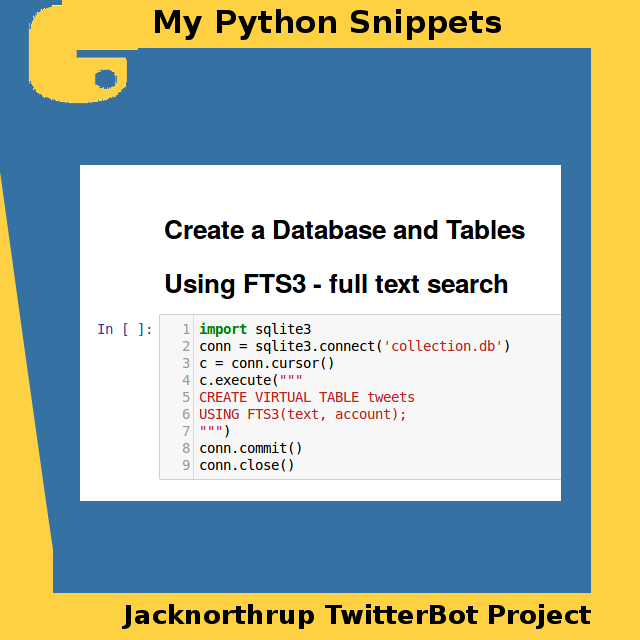

In [34]:
Image(filename='snippets/database001.png')

In [35]:
import sqlite3
import os.path
from os import listdir, getcwd
from IPython.core.display import Image 

def create_or_open_db(db_file):
    db_is_new = not os.path.exists(db_file)
    conn = sqlite3.connect(db_file)
    if db_is_new:
        print 'Creating schema'
        sql = '''create table if not exists PICTURES(
        ID INTEGER PRIMARY KEY AUTOINCREMENT,
        PICTURE BLOB,
        TYPE TEXT,
        FILE_NAME TEXT);'''
        conn.execute(sql) # shortcut for conn.cursor().execute(sql)
    else:
        print 'Schema exists\n'
    return conn

def insert_picture(conn, picture_file):
    with open(picture_file, 'rb') as input_file:
        ablob = input_file.read()
        base=os.path.basename(picture_file)
        afile, ext = os.path.splitext(base)
        sql = '''INSERT INTO PICTURES
        (PICTURE, TYPE, FILE_NAME)
        VALUES(?, ?, ?);'''
        conn.execute(sql,[sqlite3.Binary(ablob), ext, afile]) 
        conn.commit()

conn = create_or_open_db('image.db')

Schema exists



In [20]:
picture_file = "snippets/database001.png"
insert_picture(conn, picture_file)
conn.close()

def extract_picture(cursor, picture_id):
    sql = "SELECT PICTURE, TYPE, FILE_NAME FROM PICTURES WHERE id = :id"
    param = {'id': picture_id}
    cursor.execute(sql, param)
    ablob, ext, afile = cursor.fetchone()
    filename = afile + ext
    with open(filename, 'wb') as output_file:
        output_file.write(ablob)
    return filename

conn = create_or_open_db('image.db')
cur = conn.cursor()
filename = extract_picture(cur, 1)
cur.close()
conn.close()
Image(filename='./'+filename)

OperationalError: no such table: PICTURES

In [132]:
conn = create_or_open_db('image.db')
conn.execute("DELETE FROM PICTURES")
for fn in picture_list:
    picture_file = "snippets/"+fn
    insert_picture(conn, picture_file)
     
for r in conn.execute("SELECT rowid, FILE_NAME FROM PICTURES"):
    print r[0],r[1]

conn.close()

Schema exists

129 database016
130 database006
131 database012
132 database018
133 database008
134 database010
135 database021
136 database003
137 database002
138 database019
139 database011
140 database024
141 database009
142 database013
143 database023
144 snippet_base
145 database022
146 database014
147 database017
148 database001
149 database007
150 database005
151 database015
152 database020
153 database004


In [133]:
# Get your image from the database

Schema exists

database006.png


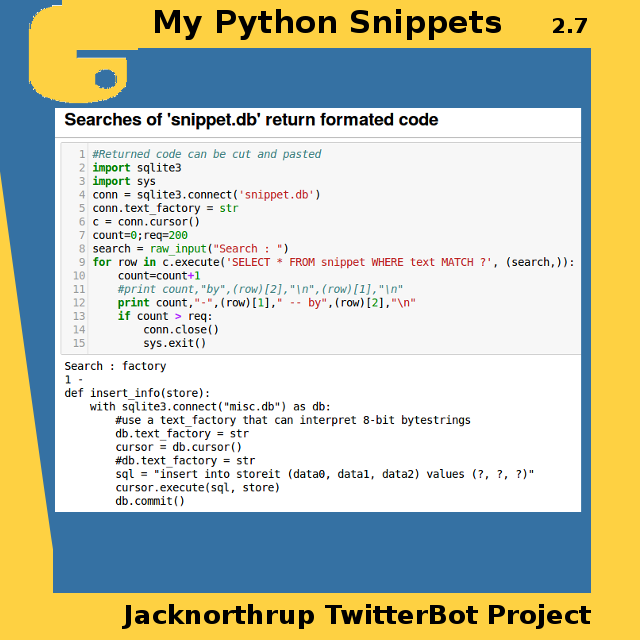

In [135]:
def get_image(cursor, picture_id):
    sql = "SELECT PICTURE, TYPE, FILE_NAME FROM PICTURES WHERE id = 130"
    param = {'id': picture_id}
    cursor.execute(sql, param)
    ablob, ext, afile = cursor.fetchone()
    filename = afile + ext
    with open(filename, 'wb') as output_file:
        output_file.write(ablob)
    return filename

conn = create_or_open_db('image.db')
cur = conn.cursor()
filename = get_image(cur, 1)
cur.close()
conn.close()
print filename
Image(filename=filename)


In [10]:
import sqlite3
#response = requests.get("/home/jack/Desktop/text_stuff/snippets/database001.png")
response = "/home/jack/Desktop/text_stuff/snippets/database001.png"
#photo = "snippet"
member_name = "snippetImage"
#response = requests.get(picture_url) #url is definitely correct
#picture = sqlite3.Binary(response.content)
picture = sqlite3.Binary(response)
con = sqlite3.connect("image.db")
cursor = con.cursor()
#sql = '''CREATE TABLE member_data(id integer primary key autoincrement, picture BLOB, name TEXT);'''
#cursor.execute(sql)

sql = 'INSERT INTO member_data (picture, name) VALUES (?, ?)', cursor.execute(sql, (picture, member_name))
cursor.execute(sql)
con.commit()

ValueError: operation parameter must be str or unicode

In [46]:
import sqlite3
import os.path
from os import listdir, getcwd
from IPython.core.display import Image 

def get_picture_list(rel_path):
    abs_path = os.path.join(os.getcwd(),rel_path)
    print 'abs_path =', abs_path
    dir_files = os.listdir(abs_path)
    #print dir_files
    return dir_files

picture_list = get_picture_list('snippets')
print picture_list

import sqlite3
import os.path
from os import listdir, getcwd
from IPython.core.display import Image 

def create_or_open_db(db_file):
    db_is_new = not os.path.exists(db_file)
    conn = sqlite3.connect(db_file)
    if db_is_new:
        print 'Creating schema'
        sql = '''create table if not exists PICTURES(
        ID INTEGER PRIMARY KEY AUTOINCREMENT,
        PICTURE BLOB,
        TYPE TEXT,
        FILE_NAME TEXT);'''
        conn.execute(sql) # shortcut for conn.cursor().execute(sql)
    else:
        print 'Schema exists\n'
    return conn

def insert_picture(conn, picture_file):
    with open(picture_file, 'rb') as input_file:
        ablob = input_file.read()
        base=os.path.basename(picture_file)
        afile, ext = os.path.splitext(base)
        sql = '''INSERT INTO PICTURES
        (PICTURE, TYPE, FILE_NAME)
        VALUES(?, ?, ?);'''
        conn.execute(sql,[sqlite3.Binary(ablob), ext, afile]) 
        conn.commit()

def loadimages(dbname, path):
    conn = sqlite3.connect(dbname)
    #conn.execute("DELETE FROM PICTURES")
    for fn in picture_list:
        picture_file = path+"/"+fn
        insert_picture(conn, picture_file)

    for r in conn.execute("SELECT rowid, FILE_NAME FROM PICTURES"):
        print r[0],r[1]
   
    conn.close()


def get_image(cursor, picture_id):
    conn = sqlite3.connect(dbname)
    c = conn.cursor()
    c.execute("SELECT PICTURE, TYPE, FILE_NAME FROM PICTURES WHERE id = ?;",(picture_id,))
    #sql = "SELECT PICTURE, TYPE, FILE_NAME FROM PICTURES WHERE id = 19"
    param = {'id': picture_id}
    cursor.execute(sql, param)
    ablob, ext, afile = cursor.fetchone()
    filename = afile + ext
    with open(filename, 'wb') as output_file:
        output_file.write(ablob)
    return filename


dbname = "ImageB.db"
db_file = create_or_open_db(dbname)
path = "snippets/"
loadimages(dbname, path)
cur = conn.cursor()
filename = get_image(cur, 16)
cur.close()
conn.close()
print filename
Image(filename=filename)


abs_path = /home/jack/Desktop/text_stuff/snippets
['database016.png', 'database025.png', 'database006.png', 'database012.png', 'database028.png', 'database018.png', 'database030.png', 'database008.png', 'database010.png', 'database021.png', 'database003.png', 'database002.png', 'database029.png', 'database019.png', 'database011.png', 'database024.png', 'database009.png', 'database013.png', 'database023.png', 'snippet_base.png', 'database027.png', 'database022.png', 'database026.png', 'database014.png', 'database017.png', 'database001.png', 'database007.png', 'database005.png', 'database015.png', 'database031.png', 'database020.png', 'database004.png']
Schema exists

1 database016
2 database006
3 database012
4 database018
5 database008
6 database010
7 database021
8 database003
9 database002
10 database019
11 database011
12 database024
13 database009
14 database013
15 database023
16 snippet_base
17 database022
18 database014
19 database017
20 database001
21 database007
22 database005
23 

ProgrammingError: Cannot operate on a closed database.

abs_path = /home/jack/Desktop/text_stuff/snippets
['database016.png', 'database025.png', 'database006.png', 'database012.png', 'database028.png', 'database018.png', 'database030.png', 'database008.png', 'database010.png', 'database021.png', 'database003.png', 'database002.png', 'database029.png', 'database019.png', 'database011.png', 'database024.png', 'database009.png', 'database013.png', 'database023.png', 'snippet_base.png', 'database027.png', 'database022.png', 'database026.png', 'database014.png', 'database017.png', 'database001.png', 'database007.png', 'database005.png', 'database015.png', 'database031.png', 'database020.png', 'database004.png']
Schema exists

1 database016
2 database006
3 database012
4 database018
5 database008
6 database010
7 database021
8 database003
9 database002
10 database019
11 database011
12 database024
13 database009
14 database013
15 database023
16 snippet_base
17 database022
18 database014
19 database017
20 database001
21 database007
22 database005
23 

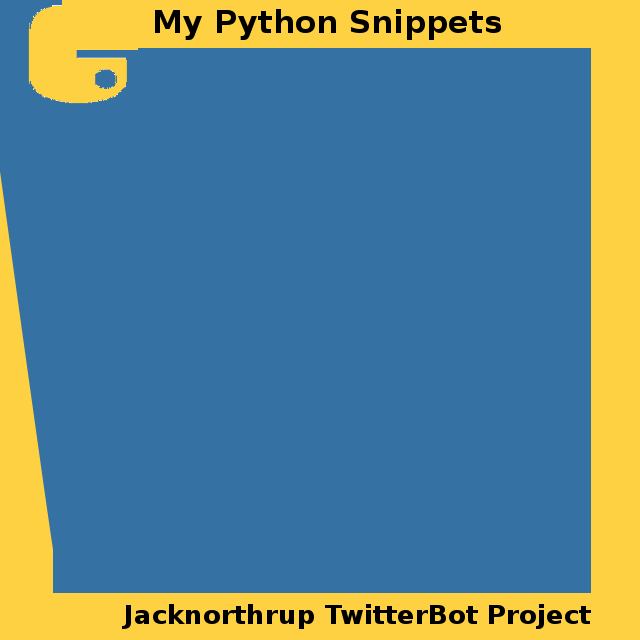

In [52]:
-

Schema exists

database017.png


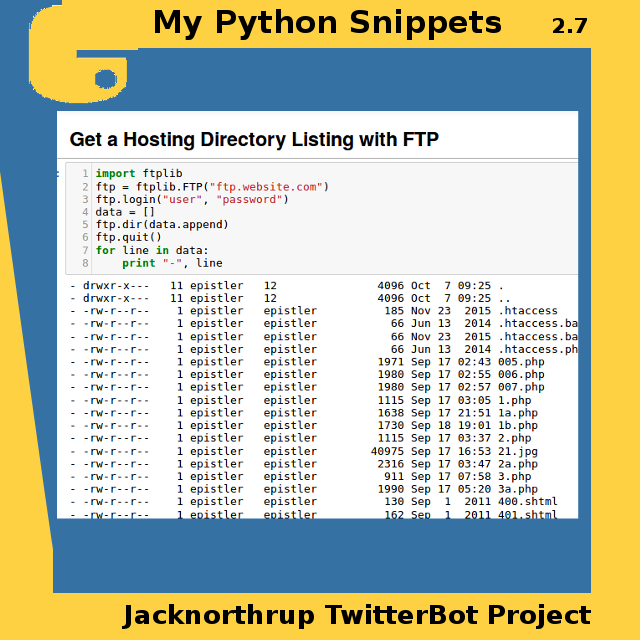

In [136]:
def get_image(cursor, picture_id):
    sql = "SELECT PICTURE, TYPE, FILE_NAME FROM PICTURES WHERE id = 19"
    param = {'id': picture_id}
    cursor.execute(sql, param)
    ablob, ext, afile = cursor.fetchone()
    filename = afile + ext
    with open(filename, 'wb') as output_file:
        output_file.write(ablob)
    return filename

conn = create_or_open_db('ImageB.db')
cur = conn.cursor()
filename = get_image(cur, 1)
cur.close()
conn.close()
print filename
Image(filename=filename)


Schema exists

database017.png


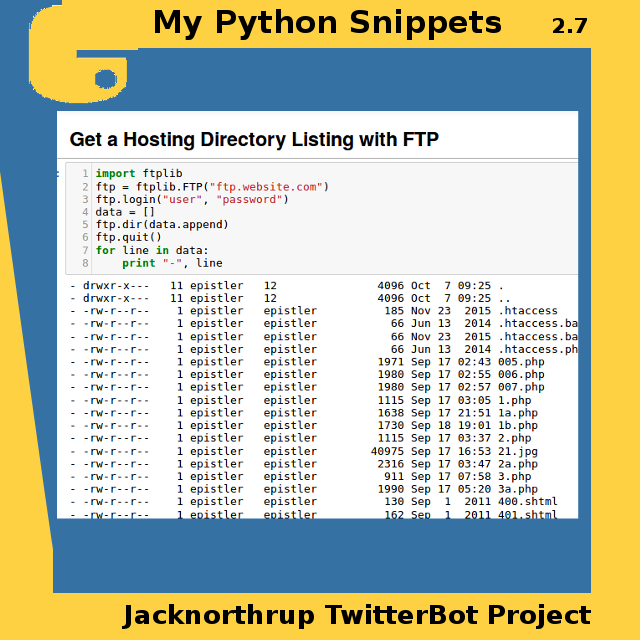

In [142]:
def get_image(cursor, image_id):
    
    #c.execute("SELECT PICTURE, TYPE, FILE_NAME FROM PICTURES WHERE id = ?;",(image_id,))
    #image_id = 19
    #sql = "SELECT PICTURE, TYPE, FILE_NAME FROM PICTURES WHERE id = ?;",(image_id,)
    #sql = "SELECT PICTURE, TYPE, FILE_NAME FROM PICTURES WHERE id = 19"
    #param = {'id': image_id}
    #cursor.execute(sql, param)
    cursor.execute("SELECT PICTURE, TYPE, FILE_NAME FROM PICTURES WHERE id = ?;",(image_id,))
    #cursor.execute("SELECT PICTURE, TYPE, FILE_NAME FROM PICTURES WHERE id = 19")
    ablob, ext, afile = cursor.fetchone()
    filename = afile + ext
    with open(filename, 'wb') as output_file:
        output_file.write(ablob)
    return filename

conn = create_or_open_db('ImageB.db')
cur = conn.cursor()
filename = get_image(cur, 19)
cur.close()
conn.close()
print filename
Image(filename=filename)


Schema exists

database017.png


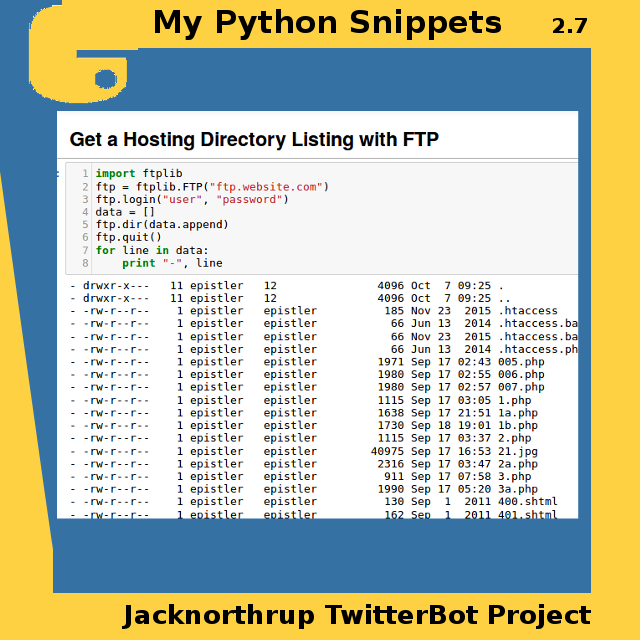

In [142]:
import sqlite3
def get_image(cursor, image_id):
    
    cursor.execute("SELECT PICTURE, TYPE, FILE_NAME FROM PICTURES WHERE id = ?;",(image_id,))
    ablob, ext, afile = cursor.fetchone()
    filename = afile + ext
    with open(filename, 'wb') as output_file:
        output_file.write(ablob)
    return filename

conn = create_or_open_db('ImageB.db')
cur = conn.cursor()
filename = get_image(cur, 19)
cur.close()
conn.close()
print filename
Image(filename=filename)


In [53]:
import Image2Data
dbname = "ImageD.db"
Image2Data.image_id(dbname)

1 01.jpg
2 database016.png
3 database025.png
4 database006.png
5 database012.png
6 database028.png
7 database018.png
8 database030.png
9 database008.png
10 database010.png
11 database021.png
12 database003.png
13 database002.png
14 database029.png
15 database019.png
16 database011.png
17 database024.png
18 database009.png
19 database013.png
20 database023.png
21 snippet_base.png
22 database027.png
23 database022.png
24 database026.png
25 database014.png
26 database017.png
27 database001.png
28 database007.png
29 database005.png
30 database015.png
31 database031.png
32 database020.png
33 database004.png


In [ ]:
import sqlite3
conn = sqlite3.connect('image.db')
c = conn.cursor()
c.execute("""
CREATE VIRTUAL TABLE File 
USING FTS3(id, name, image);
""")
conn.commit()
conn.close()

conn = sqlite3.connect('newdatabase02')
c = conn.cursor()
c.execute('insert into File 
(id, name, bin) values (?,?,?)', (id, name, sqlite3.Binary(file.read())))
conn.commit()
conn.close()

# --------------------------------------

# Record Terminal Bash History to Txt file

In [102]:
from time import sleep
import sqlite3

file0 = open("history.txt","r")
lists = file0.readlines()
for list in lists:
    sleep(.5)
    print list

21240  ls /usr/lib/go-1.6/src/

21241  locate src/src

21242  source ~/.bashrc

21243  $GOPATH

21244  go run main.go -vv -m 3 -s 735 -a 0 -r 500 -i inputs/timeless.png -o outputs/timeless_00%3d.png -n 400

21245  ffmpeg -framerate 10 -i %04d.jpg -c:v libx264 -r 30 -pix_fmt yuv420p circles.mp4

21246  mogrify -size 740x740 %4d.jpg

21247  mogrify -size 740x740 0???.jpg

21248  ffmpeg -framerate 10 -i %04d.jpg -c:v libx264 -r 30 -pix_fmt yuv420p circles.mp4

21249  mogrify -size 740x740 *.jpg

21250  mogrify -resize 740x740 *.jpg

21251  ffmpeg -framerate 10 -i %04d.jpg -c:v libx264 -r 30 -pix_fmt yuv420p circles.mp4

21252  ffmpeg -framerate 10 -i timeless%03d.jpg -c:v libx264 -r 30 -pix_fmt yuv420p circles2.mp4

21253  ffplay circles2.mp4

21254  ls *.mp4

21255  ffplay

21256  ffmpeg -i circles2.mp4 -r 16 -filter:v "setpts=0.9*PTS" slowcircle2.mp4

21257  ffmpeg -i circles2.mp4 -r 16 -filter:v "setpts=0.7*PTS" slowcircle2.mp4

21258  ffmpeg -i slowcircle2.mp4 -i title.png -filter_com

KeyboardInterrupt: 

# Record your Linux History to database

In [98]:
from time import sleep
import sqlite3
conn = sqlite3.connect('history.db')
c = conn.cursor()
conn.text_factory = str
c.execute("""
CREATE VIRTUAL TABLE history 
USING FTS3(text);
""")
conn.commit()
conn.close()

fileO = open("history.txt","r")
lists = fileO.readlines()
for list in lists:
    #list = list.encode("ascii", "ignore")
    list = list.decode('utf-8').strip() 
    conn = sqlite3.connect('history.db')
    c = conn.cursor()
    c.execute('insert into history values (?)', (list,))
    conn.commit()
    conn.close()

In [159]:
import sqlite3
import sys
conn = sqlite3.connect('history2.db')
conn.text_factory = str
c = conn.cursor()
count=0;req=200
search = raw_input("Search : ")
for row in c.execute('SELECT rowid, text FROM history WHERE text MATCH ?', (search,)):    
    count=count+1
    print (row)[0],"-",(row)[1],"\n"
    if count > req:
        conn.close()
        sys.exit()

Search : ffmpeg
898 - ffmpeg -i "rtmp://127.0.0.1/video_audio live=1" -f mpeg1video -b:v 500k -r 21 -q:v 10 -s 640x480 http://127.0.0.1:8000/temp123/640/480/ 

899 - sudo ffmpeg -i "rtmp://127.0.0.1/video_audio live=1" -f mpeg1video -b:v 500k -r 21 -q:v 10 -s 640x480 http://127.0.0.1:8000/temp123/640/480/ 

900 - sudo ffmpeg -i "rtmp://127.0.0.1/video_audio live=1" -f mpeg1video -b:v 500k -r 21 -q:v 10 -s 640x480 http://127.0.0.1:8080/temp123/640/480/ 

901 - ffmpeg -f vfwcap -i 0 -f image2 -vcodec mjpeg -b:v 500k -r 21 -q:v 10 -s 640x480 http://127.0.0.1:8082/temp123/640/480/image-%3d.jpg 

922 - ffmpeg -f vfwcap -i 0 -f image2 -vcodec mjpeg -b:v 500k -r 21 -q:v 10 -s 640x480 http://127.0.0.1:8082/temp123/640/480/image-%3d.jpg 

923 - ffmpeg -i "rtmp://127.0.0.1/video_audio live=1" -f mpeg1video -b:v 500k -r 21 -q:v 10 -s 640x480 http://127.0.0.1:8082/temp123/640/480/ 

1026 - ffmpeg -s 640x480 -f video4linux2 -i /dev/video0 -f mpeg1video -b:v 800k -r 30 http://192.168.1.15:8082/1693/

SystemExit: 

In [73]:
from time import sleep
import sqlite3
conn = sqlite3.connect('history.db')
c = conn.cursor()
search = ("sudo")
for row in c.execute('SELECT rowid, text FROM history WHERE text LIKE (?)', (search,)):
    print row[0],row[1]


In [76]:
import sqlite3
import sys
conn = sqlite3.connect('history.db')
conn.text_factory = str
c = conn.cursor()
count=0;req=200
id1 = raw_input("Starting ID : ")
id2 = raw_input("How Many Rows : ")
for row in c.execute('SELECT rowid, * from history LIMIT ? OFFSET ?',  (id2, id1)):
    count=count+1
    print (row)[0],"-",(row)[1],
    if count > req:
        conn.close()
        sys.exit()

Starting ID : 600
How Many Rows : 20
601 - bare.html~
602 - basemap
603 - blender.desktop~
604 - Books
605 - button.py~
606 - button.sh~
607 - chatterbot-stuff
608 - chrome.desktop~
609 - config.inc.php~
610 - Context-Free-in-Jupyter-Notebook
611 - csptest
612 - databases
613 - deep-dream-generator
614 - DeepDreamStuff.html~
615 - desktop
616 - dhoiem.cs
617 - djangochatterbot
618 - DOCKER.html~
619 - editorJSON
620 - exp2.html~


In [151]:
from time import sleep
import sqlite3
conn = sqlite3.connect('fts4.db')
c = conn.cursor()
conn.text_factory = str
# Create an FTS4 table named "pages" with one column: code
c.execute("""
CREATE VIRTUAL TABLE pages USING fts4(code);
""")
conn.commit()
conn.close()


ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



OperationalError: table pages already exists

In [202]:
import DBstore
insert="""
def dbstore(insert):
    import sqlite3
    conn = sqlite3.connect('XPfts4.db')
    c = conn.cursor()
    c.execute(""
    CREATE VIRTUAL TABLE IF NOT EXISTS code 
    USING FTS3(code);
    ""
    )
    c = conn.cursor()
    conn.text_factory = str
    # CREATE VIRTUAL TABLE pages USING fts4(code);
    c.execute("INSERT INTO pages VALUES(?)", (insert,))

    conn.commit()
    conn.close()
    return 
    
    
def dbread():
    import sqlite3
    conn = sqlite3.connect('XPfts4.db')
    c = conn.cursor()
    req = 100
    view = raw_input("Search : ")
    for row in c.execute('SELECT rowid, code FROM pages WHERE pages MATCH ?', (view,)):    
        count=count+1
        print (row)[0],"-",(row)[1],"\n"
        if count > req:
            conn.close()
            sys.exit()
            return
quick database QUICKdb QUICK
"""
DBstore.dbstore(insert)

In [197]:
!rm DBread.pyc

In [203]:
%%writefile DBread.py
def dbread():
    import sqlite3
    conn = sqlite3.connect('XPfts4.db')
    c = conn.cursor()
    count = 0
    req = 100
    view = raw_input("Search : ")
    for row in c.execute('SELECT rowid, code FROM pages WHERE pages MATCH ?', (view,)):    
        count=count+1
        print (row)[0],"-",(row)[1],"\n"
        if count > req:
            conn.close()
            sys.exit()

Overwriting DBread.py


In [204]:
import DBread
DBread.dbread()

TypeError: dbread() takes exactly 1 argument (0 given)

In [200]:
%reset -f

In [188]:
%%writefile DBstore.py
def dbstore(insert):
    import sqlite3
    conn = sqlite3.connect('XPfts4.db')
    c = conn.cursor()
    c.execute("""
    CREATE VIRTUAL TABLE IF NOT EXISTS pages 
    USING FTS3(code);
    """
    )
    c = conn.cursor()
    conn.text_factory = str
    # CREATE VIRTUAL TABLE pages USING fts4(code);
    c.execute("INSERT INTO pages VALUES(?)", (insert,))

    conn.commit()
    conn.close()

Overwriting DBstore.py


In [185]:
%%writefile QUICKdb.py
def dbstore(insert):
    import sqlite3
    conn = sqlite3.connect('XPfts4.db')
    c = conn.cursor()
    c.execute("""CREATE VIRTUAL TABLE IF NOT EXISTS history 
    USING FTS3(hist);
    """
             )
    c = conn.cursor()
    conn.text_factory = str
    # CREATE VIRTUAL TABLE pages USING fts4(code);
    c.execute("INSERT INTO pages VALUES(?)", (insert,))

    conn.commit()
    conn.close()
    return 
    
    
def dbread():
    import sqlite3
    conn = sqlite3.connect('XPfts4.db')
    c = conn.cursor()
    req = 100
    view = raw_input("Search : ")
    for row in c.execute('SELECT rowid, code FROM pages WHERE pages MATCH ?', (view,)):    
        count=count+1
        print (row)[0],"-",(row)[1],"\n"
        if count > req:
            conn.close()
            sys.exit()
            return


Overwriting QUICKdb.py


In [182]:
!rm QUICKdb.pyc

rm: cannot remove 'QUICKdb.pyc': No such file or directory


In [183]:
import QUICKdb
insert="""
def dbstore(insert):
    import sqlite3
    conn = sqlite3.connect('XPfts4.db')
    c = conn.cursor()
    c.execute(""
    CREATE VIRTUAL TABLE IF NOT EXISTS code 
    USING FTS3(code);
    ""
    )
    c = conn.cursor()
    conn.text_factory = str
    # CREATE VIRTUAL TABLE pages USING fts4(code);
    c.execute("INSERT INTO pages VALUES(?)", (insert,))

    conn.commit()
    conn.close()
    return 
    
    
def dbread():
    import sqlite3
    conn = sqlite3.connect('XPfts4.db')
    c = conn.cursor()
    req = 100
    view = raw_input("Search : ")
    for row in c.execute('SELECT rowid, code FROM pages WHERE pages MATCH ?', (view,)):    
        count=count+1
        print (row)[0],"-",(row)[1],"\n"
        if count > req:
            conn.close()
            sys.exit()
            return
quick database QUICKdb QUICK
"""
QUICKdb.dbstore(insert)

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 4))



OperationalError: vtable constructor failed: code

In [ ]:
%%writefile DBread.py
def dbread(insert):
import sqlite3
    conn = sqlite3.connect('XPfts4.db')
    c = conn.cursor()
req = 100
view = raw_input("Search : ")
for row in c.execute('SELECT rowid, code FROM pages WHERE pages MATCH ?', (view,)):    
    count=count+1
    print (row)[0],"-",(row)[1],"\n"
    if count > req:
        conn.close()
        sys.exit()

In [156]:
import sqlite3
conn = sqlite3.connect('fts4.db')
c = conn.cursor()
conn.text_factory = str
# CREATE VIRTUAL TABLE pages USING fts4(code);
req = 100
view = raw_input("Search : ")
for row in c.execute('SELECT rowid, code FROM pages WHERE pages MATCH ?', (view,)):    
    count=count+1
    print (row)[0],"-",(row)[1],"\n"
    if count > req:
        conn.close()
        sys.exit()


Search : create
1 - 
import sqlite3
conn = sqlite3.connect('fts4.db')
c = conn.cursor()
conn.text_factory = str
# CREATE VIRTUAL TABLE pages USING fts4(code);
req = 100
view = raw_input("Search : ")
c.execute("SELECT rowid, code FROM pages VALUES(?)", (view))
for row in c.execute('SELECT rowid, code FROM pages WHERE pages MATCH ?', (view,)):    
    count=count+1
    print (row)[0],"-",(row)[1],"
"
    if count > req:
        conn.close()
        sys.exit()
-------
fts4.db fts4 CREATE VIRTUAL TABLE text_factory raw_input




SystemExit: 